# Example data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Kaggle - Dữ liệu mẫu

In [ ]:
df = pd.read_csv("data/Algerian_forest_fires_dataset.csv")

In [6]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [8]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        2
dtype: int64

In [9]:
df.shape

(247, 14)

In [10]:
# Kết hợp 2 vùng trong bộ dataset
df.loc[:122, "Region"] = int(0)
df.loc[122:, "Region"] = int(1)
df.Region = df.Region.astype(int)

In [ ]:
# drop NAN
df.drop(index=[122, 123, 124], inplace=True, axis=1)
df = df.reset_index(drop=True)

In [12]:
df.shape

(244, 15)

In [13]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
# Chỉnh lại kiểu dữ liệu
df[df.columns[:6]] = df[df.columns[:6]].astype(int)
df[df.columns[6:13]] = df[df.columns[6:13]].astype(float)

In [15]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               5
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [16]:
df.Classes = df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [17]:
df.Classes = np.where(df.Classes == 'fire', 1, 0)

#### EDA

In [18]:
df_copy = df.copy()
df_copy.drop(['year', 'month', 'day'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.7 KB


In [20]:
df_copy.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [21]:
# Kiểm tra số lượng mỗi class
df_copy['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

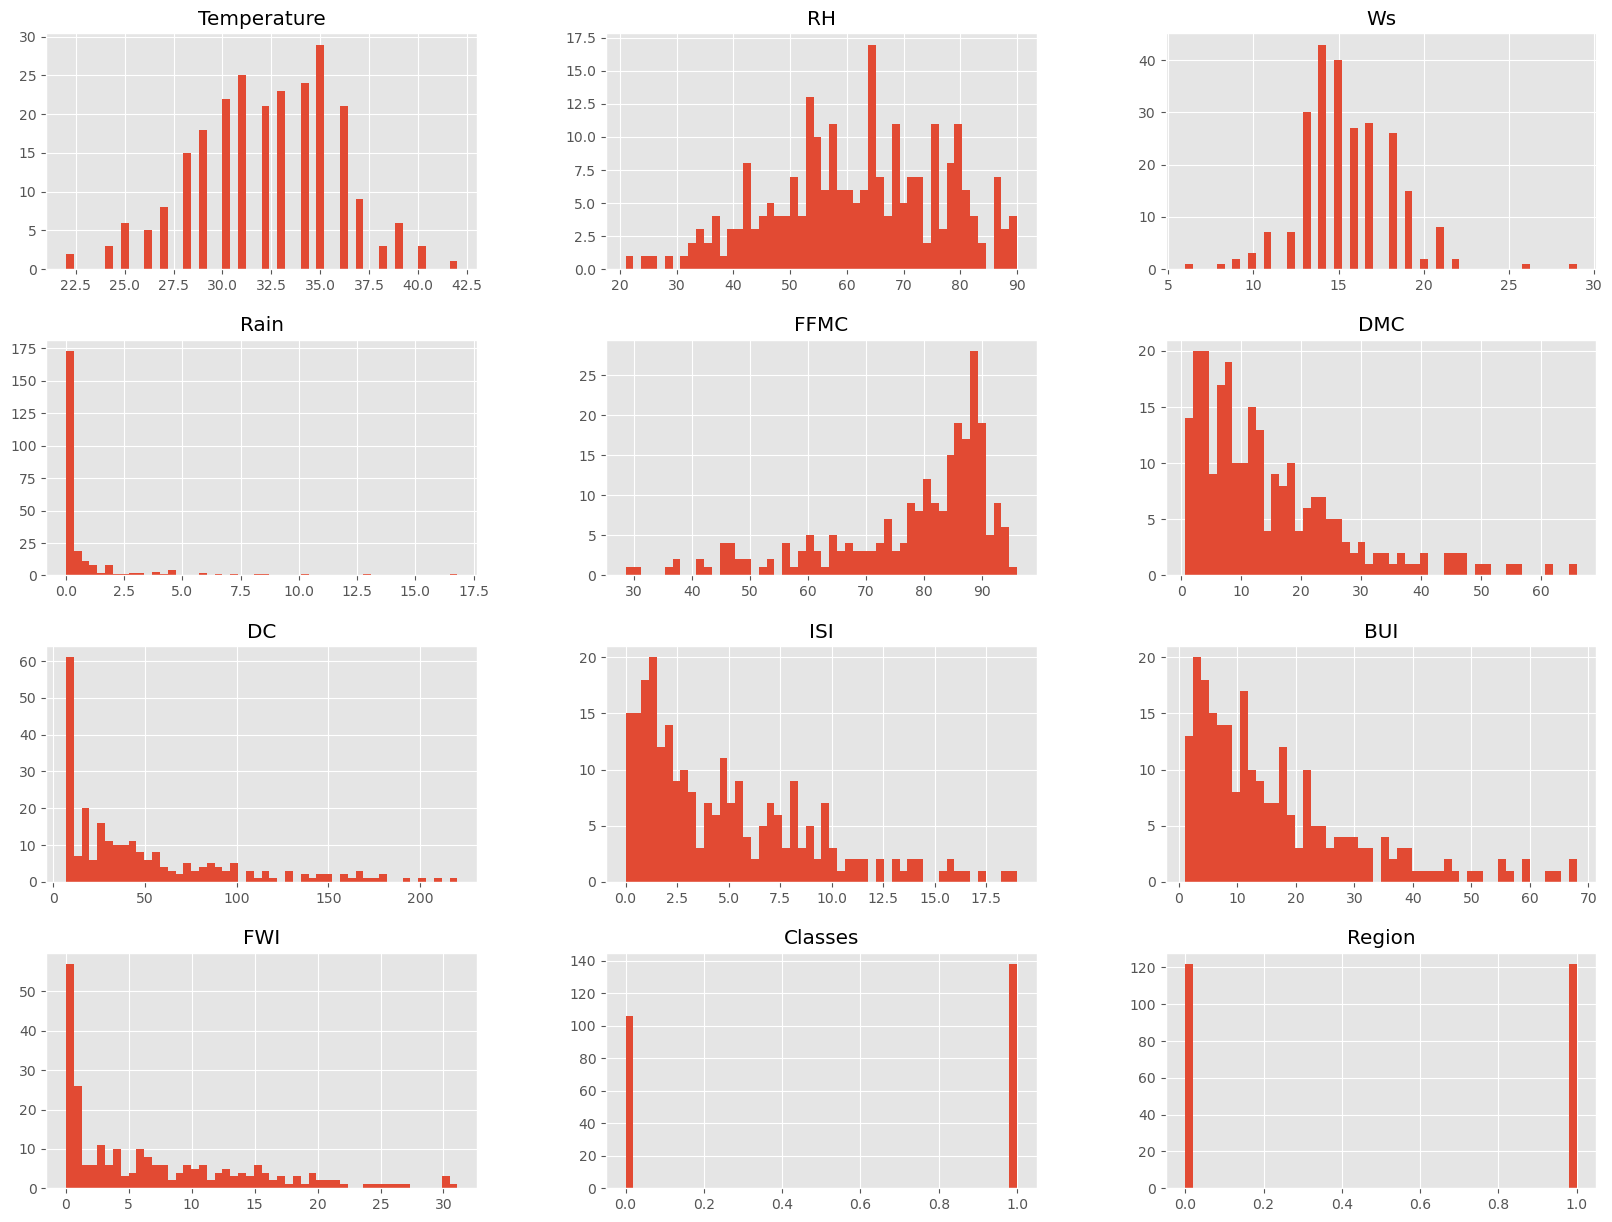

In [22]:
# Vẽ biểu đồ phân bố dữ liệu cho tất cả các trường dữ liệu
plt.style.use('ggplot')
df_copy.hist(bins=50, figsize=(20, 15))

['Fire', 'Not Fire']


Text(0.5, 1.0, 'Pie chart for Classes')

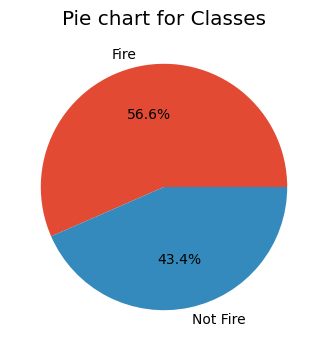

In [23]:
# Vẽ biểu đồ tròn cho Classes
percentage = df_copy.Classes.value_counts(normalize=True) * 100
classlabels = ['Fire', 'Not Fire']
plt.figure(figsize=(6, 4))
print(classlabels)
plt.pie(percentage, labels=classlabels, autopct="%1.1f%%")
plt.title('Pie chart for Classes')

<Axes: >

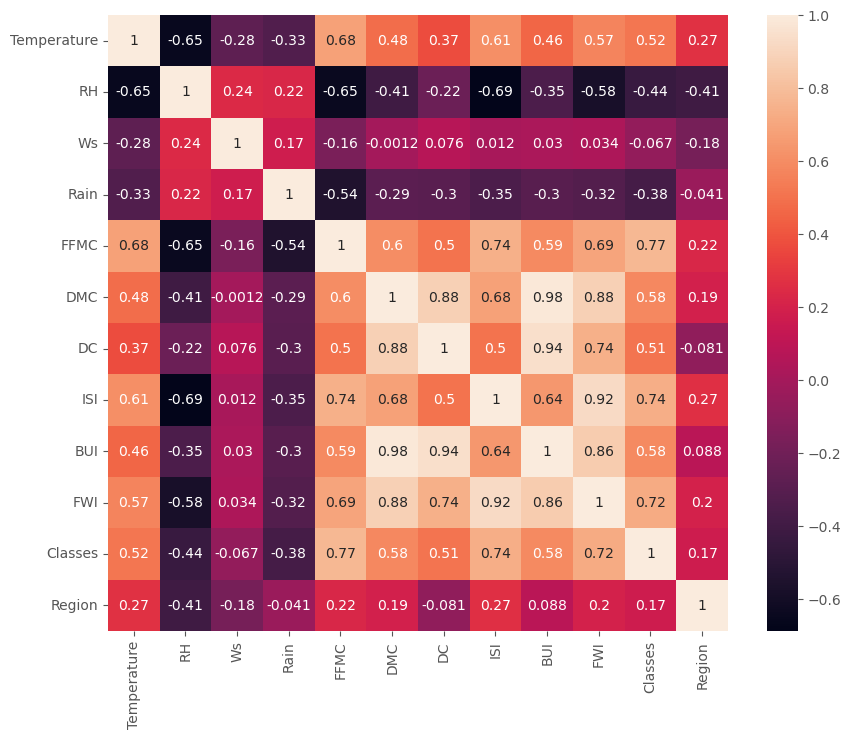

In [24]:
# correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True)

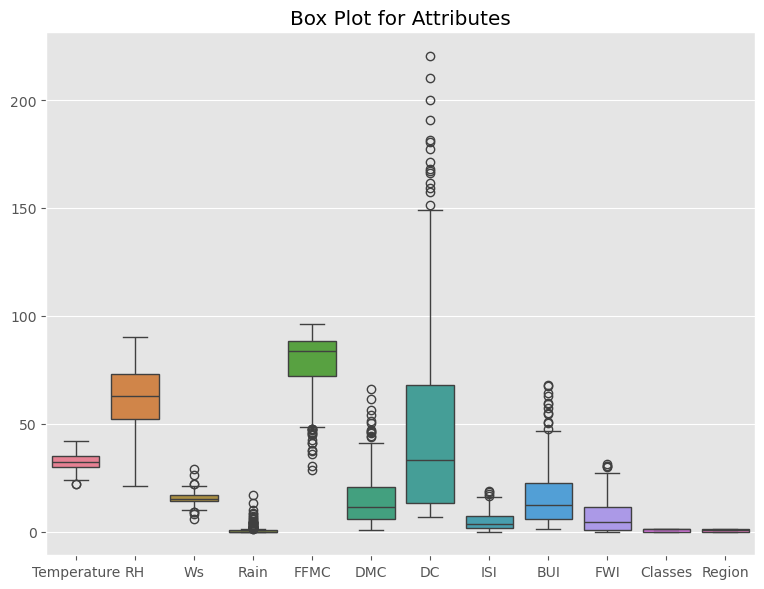

In [ ]:
# boxplot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_copy)
plt.title("Box Plot for Attributes")
plt.tight_layout()

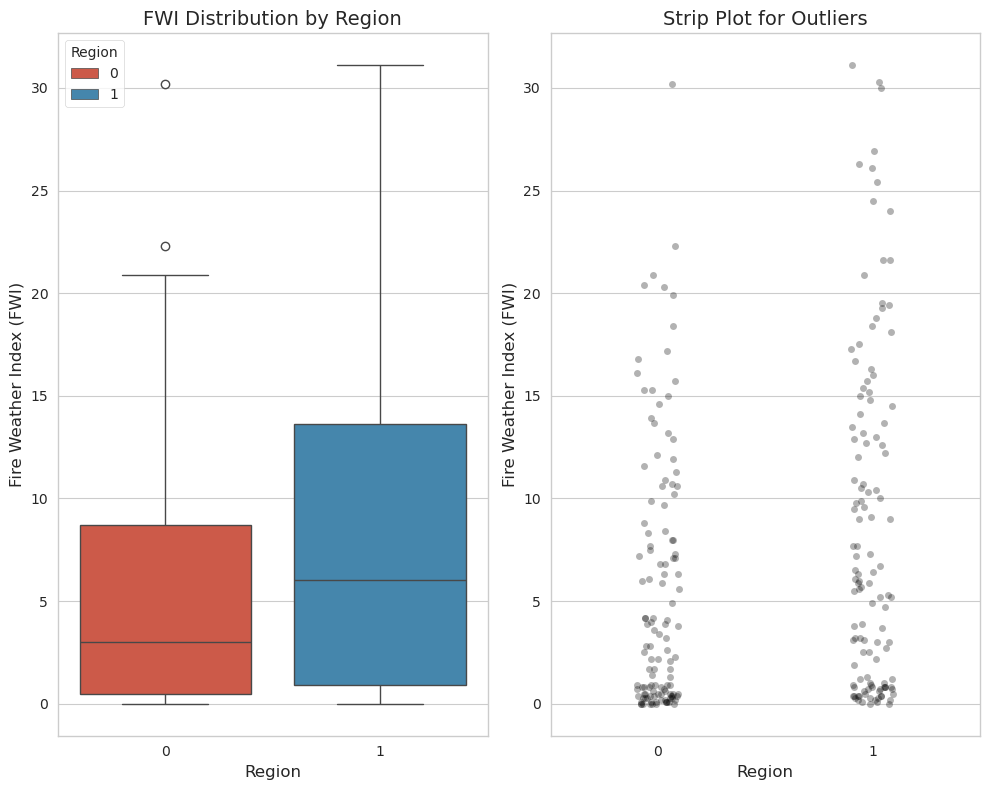

In [ ]:
# boxplots để tìm ngoại lai trong vùng
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
plt.subplot(1, 2, 1)
sns.boxplot(x='Region', y='FWI', hue='Region', data=df_copy)
plt.title('FWI Distribution by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Fire Weather Index (FWI)')
plt.subplot(1, 2, 2)
sns.stripplot(x='Region', y='FWI', data=df_copy,
              color='black', alpha=0.3, jitter=True)
plt.title('Strip Plot for Outliers', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Fire Weather Index (FWI)')
plt.tight_layout()

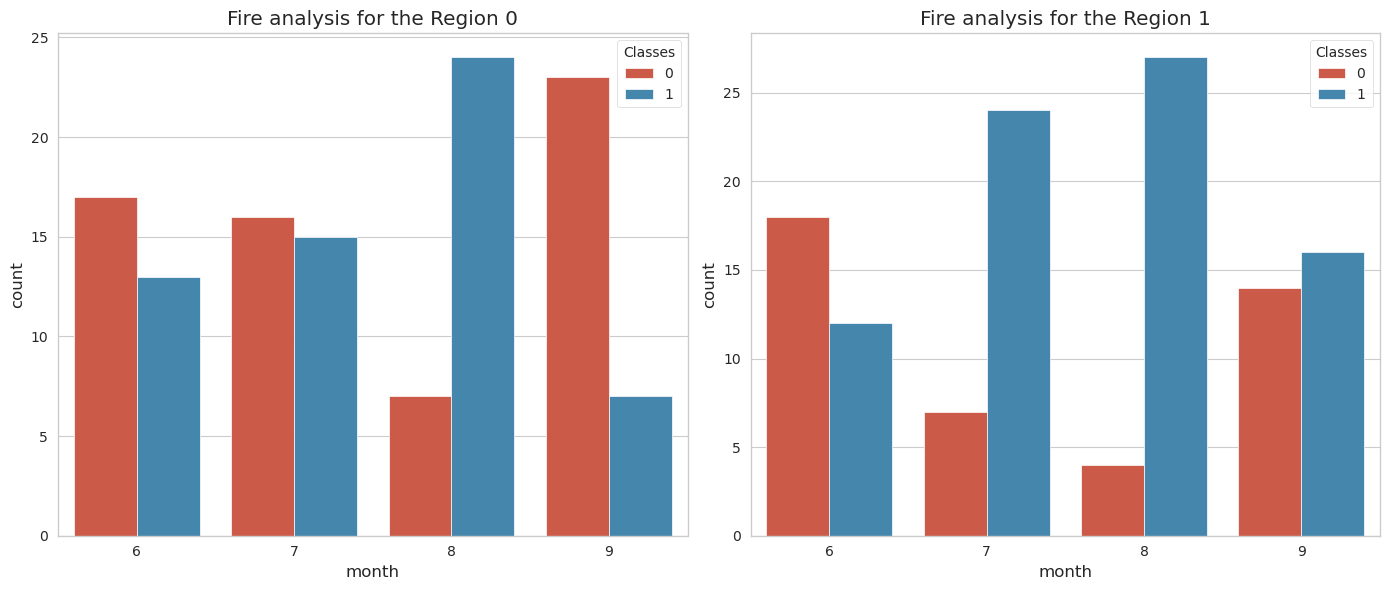

In [ ]:
# số lượng cháy hàng tháng trong từng khu vực
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
dftemp = df[df.Region == 0]
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.title('Fire analysis for the Region 0')
plt.subplot(1, 2, 2)
dftemp = df[df.Region == 1]
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.title('Fire analysis for the Region 1')
plt.tight_layout()

- Các vụ cháy thường diễn ra vào tháng 8 trong năm ở cả hai vùng

<Axes: xlabel='day', ylabel='Temperature'>

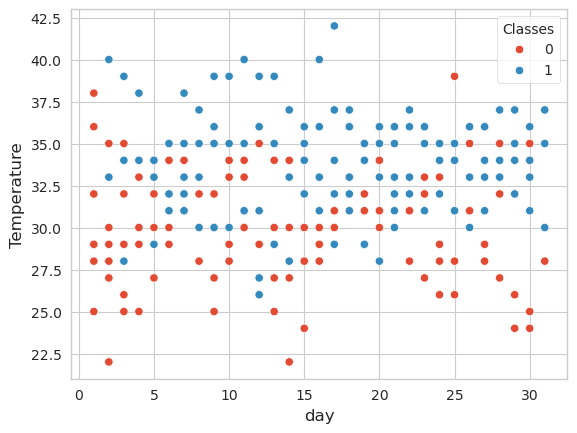

In [28]:
# scatter plot cho nhiệt độ và ngày
sns.scatterplot(y='Temperature', x='day', data=df, hue='Classes')

<Figure size 800x600 with 0 Axes>

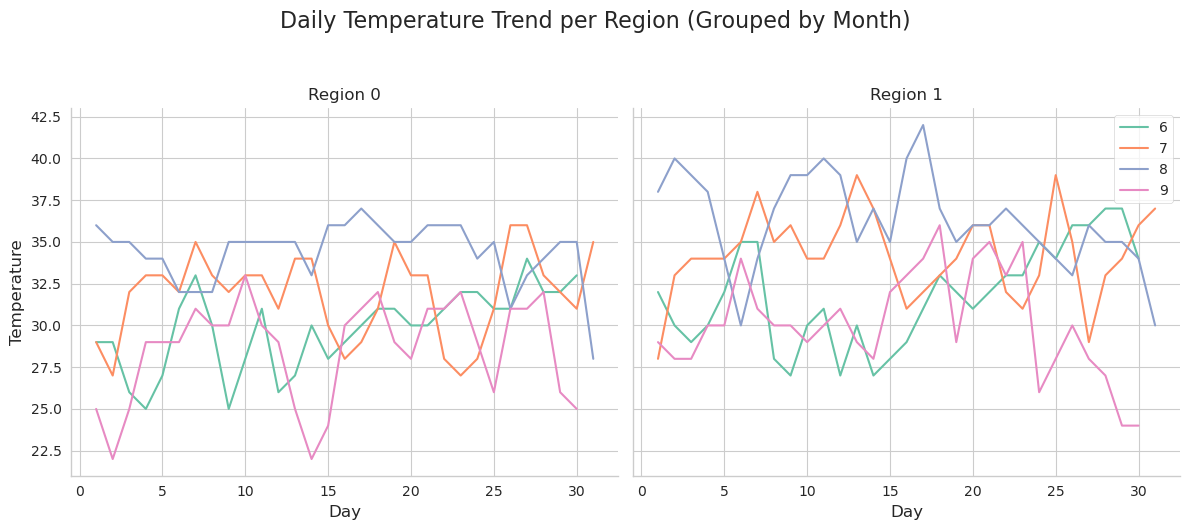

In [ ]:
# biểu đồ nhiệt độ cho từng ngày trong tháng
plt.figure(figsize=(8, 6))
df_temp = df[['day', 'month', 'Region', 'Temperature']]

g = sns.FacetGrid(df_temp, col="Region", height=5, aspect=1.2)
g.map_dataframe(sns.lineplot, x="day", y="Temperature",
                hue="month", palette='Set2')

g.set_axis_labels("Day", "Temperature")
g.set_titles("Region {col_name}")
plt.suptitle(
    "Daily Temperature Trend per Region (Grouped by Month)", fontsize=16, y=1.05)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

# Pipeline Merge

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:
def round_to_grid(x, step=0.25):
    return np.round(x / step) * step


def parse_acq_time(val):
    try:
        s = f"{int(val):04d}"
        hh, mm = int(s[:-2]), int(s[-2:])
        return pd.to_timedelta(hh, unit="h") + pd.to_timedelta(mm, unit="m")
    except Exception:
        return pd.NaT


def rh_from_t_tdew_celsius(T_c, Td_c):
    a, b = 17.625, 243.04
    es = 6.1094 * np.exp((a * T_c) / (b + T_c))
    e = 6.1094 * np.exp((a * Td_c) / (b + Td_c))
    RH = 100.0 * (e / es)
    return np.clip(RH, 0, 100)

In [ ]:
def build_algerian_like(
    era5_path,
    modis_path,
    output_csv,
    grid_step=0.25,
    label_all_fire=True
):
    # Đọc dữ liệu
    era5 = pd.read_csv(era5_path)
    modis = pd.read_csv(modis_path)

    # Chuẩn hoá tên cột lat/lon
    era5 = era5.rename(columns={"latitude": "lat", "longitude": "lon"})
    modis = modis.rename(columns={"latitude": "lat", "longitude": "lon"})

    # Parse thời gian
    era5["valid_time"] = pd.to_datetime(era5["valid_time"], errors="coerce")
    era5["date"] = era5["valid_time"].dt.date

    modis["acq_date"] = pd.to_datetime(modis["acq_date"], errors="coerce")
    modis["acq_delta"] = modis["acq_time"].apply(parse_acq_time)
    modis["event_time"] = modis["acq_date"] + modis["acq_delta"]
    modis["date"] = pd.to_datetime(modis["event_time"]).dt.date

    # Làm tròn về lưới ERA5 0.25° rồi join theo date + lat_grid + lon_grid
    era5["lat_grid"] = round_to_grid(era5["lat"], grid_step)
    era5["lon_grid"] = round_to_grid(era5["lon"], grid_step)
    modis["lat_grid"] = round_to_grid(modis["lat"], grid_step)
    modis["lon_grid"] = round_to_grid(modis["lon"], grid_step)

    join_cols = ["date", "lat_grid", "lon_grid"]

    # Chỉ giữ các trường ERA5 cần thiết để tránh nhân bản
    era5_keep = era5[join_cols + ["t2m", "d2m", "u10", "v10", "tp"]].copy()
    era5_keep = era5_keep.drop_duplicates()

    # Giữ các trường MODIS hữu ích cho ngữ cảnh
    modis_keep = modis[join_cols + [
        "lat", "lon", "brightness", "confidence", "bright_t31", "frp",
        "daynight", "type", "event_time"
    ]].dropna(subset=["date"]).copy()

    merged = pd.merge(modis_keep, era5_keep, on=join_cols, how="left")

    # === Tính các trường theo chuẩn Algerian ===
    # Temperature (°C) từ t2m (K)
    merged["Temperature"] = merged["t2m"] - 273.15

    # RH (%) từ t2m (K) & d2m (K)
    T_c = merged["t2m"] - 273.15
    Td_c = merged["d2m"] - 273.15
    merged[" RH"] = rh_from_t_tdew_celsius(T_c, Td_c)

    # Ws (km/h) từ u10, v10 (m/s)
    merged[" Ws"] = np.sqrt(merged["u10"]**2 + merged["v10"]**2) * 3.6

    # Rain (mm) từ tp (m)
    merged["Rain "] = merged["tp"] * 1000.0

    # day / month / year
    merged["day"] = pd.to_datetime(merged["date"]).dt.day
    merged["month"] = pd.to_datetime(merged["date"]).dt.month
    merged["year"] = pd.to_datetime(merged["date"]).dt.year

    # Nhãn Classes
    if label_all_fire:
        merged["Classes  "] = "fire"

    # Sắp xếp cột giống Algerian, kèm thêm metadata hữu ích
    algerian_like_cols = ["day", "month", "year",
                          "Temperature", " RH", " Ws", "Rain ", "Classes  "]
    extra_cols = ["lat", "lon", "lat_grid", "lon_grid", "date", "event_time",
                  "brightness", "confidence", "bright_t31", "frp", "daynight", "type"]

    # Một số cột (vd Classes) có thể chưa tồn tại nếu label_all_fire=False
    out_cols = [
        c for c in algerian_like_cols if c in merged.columns] + extra_cols
    final_df = merged[out_cols].copy()

    final_df.to_csv(output_csv, index=False)
    return final_df

In [ ]:
base = Path("data/data")
era5_path = base / "era5" / "era5_2000.csv"
modis_path = base / "nasa" / "modis_2000_Vietnam.csv"
out_path = base / "clean" / "modis_era5_vietnam2000_algerian_like.csv"

df = build_algerian_like(era5_path, modis_path, out_path)
print("Saved:", out_path, "| Shape:", df.shape)
print(df.head(10).to_string(index=False))

Saved: data/data/clean/modis_era5_vietnam2000_algerian_like.csv | Shape: (181, 20)
 day  month  year  Temperature        RH        Ws    Rain  Classes       lat      lon  lat_grid  lon_grid       date          event_time  brightness  confidence  bright_t31  frp daynight  type
   1     11  2000     17.18862 61.271694  9.664201 0.000000      fire 21.6437 107.2960     21.75    107.25 2000-11-01 2000-11-01 03:23:00       312.5          71       296.9 23.9        D     0
   1     11  2000     20.13590 56.888164 11.724400 0.000000      fire 21.5651 107.7963     21.50    107.75 2000-11-01 2000-11-01 03:23:00       310.9          67       296.4 15.5        D     0
   1     11  2000     20.13590 56.888164 11.724400 0.000000      fire 21.5632 107.8131     21.50    107.75 2000-11-01 2000-11-01 03:23:00       321.2          79       296.5 34.8        D     0
   1     11  2000     17.18862 61.271694  9.664201 0.000000      fire 21.6394 107.2884     21.75    107.25 2000-11-01 2000-11-01 03:23:00    

In [6]:
df.shape

(181, 20)

In [7]:
pd.read_csv("data/data/nasa/modis_2000_Vietnam.csv").shape

(181, 15)

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from pathlib import Path

# ======================= CẤU HÌNH ĐƯỜNG DẪN =======================
# Đặt thư mục gốc dữ liệu của bạn ở đây:
BASE_DIR = Path("data/data")            # ví dụ: data/data
ERA5_PATH = BASE_DIR / "era5" / "era5_2000.csv"
MODIS_PATH = BASE_DIR / "nasa" / "modis_2000_Vietnam.csv"
OUT_PATH = BASE_DIR / "modis_era5_vietnam2000_algerian_like_with_fwi.csv"

# ======================= HÀM TIỆN ÍCH ==============================


def parse_acq_time(v):
    """MODIS acq_time (int HHMM) -> Timedelta; xử lý cả NaN."""
    try:
        iv = int(v)
        s = f"{iv:04d}"
        hh, mm = int(s[:-2]), int(s[-2:])
        return pd.to_timedelta(hh, unit="h") + pd.to_timedelta(mm, unit="m")
    except Exception:
        return pd.NaT


def round25(x):
    """Làm tròn về lưới 0.25°."""
    return np.round(x/0.25)*0.25

# ======================= HÀM FWI (Van Wagner) ======================


def ffmc_step(ffmc_prev, T, RH, W, R):
    mo = 147.2*(101.0-ffmc_prev)/(59.5+ffmc_prev)
    if R > 0.5:
        rf = R - 0.5
        if mo <= 150.0:
            mr = mo + 42.5*rf*np.exp(-100.0/(251.0-mo)) * \
                (1.0 - np.exp(-6.93/rf))
        else:
            mr = mo + 42.5*rf*np.exp(-100.0/(251.0-mo))*(1.0 - np.exp(-6.93/rf)) \
                + 0.0015*(mo-150.0)**2 * (rf**0.5)
        mo = min(mr, 250.0)
    Ed = 0.942*(RH**0.679) + 11*np.exp((RH-100.0)/10.0) + \
        0.18*(21.1 - T)*(1 - np.exp(-0.115*RH))
    Ew = 0.618*(RH**0.753) + 10*np.exp((RH-100.0)/10.0) + \
        0.18*(21.1 - T)*(1 - np.exp(-0.115*RH))
    if mo > Ed:
        ko = 0.424*(1 - (RH/100.0)**1.7) + 0.0694*(W**0.5)*(1 - (RH/100.0)**8)
        kd = ko*0.581*np.exp(0.0365*T)
        m = Ed + (mo-Ed)*(10**(-kd))
    elif mo < Ew:
        k1 = 0.424*(1 - ((100.0-RH)/100.0)**1.7) + 0.0694 * \
            (W**0.5)*(1 - ((100.0-RH)/100.0)**8)
        kw = k1*0.581*np.exp(0.0365*T)
        m = Ew - (Ew-mo)*(10**(-kw))
    else:
        m = mo
    return float(np.clip(59.5*(250.0-m)/(147.2+m), 0, 101))


def dmc_step(dmc_prev, T, RH, R, month):
    if R > 1.5:
        Pe = 0.92*R - 1.27
        Mm1 = 20 + np.exp(5.6348 - dmc_prev/43.43)
        if dmc_prev <= 33:
            b = 100.0/(0.5 + 0.3*dmc_prev)
        elif dmc_prev <= 65:
            b = 14.0 - 1.3*np.log(dmc_prev)
        else:
            b = 6.2*np.log(dmc_prev) - 17.2
        Mr = Mm1 + 1000.0*Pe/(48.77 + b*Pe)
        dmc_prev = max(244.72 - 43.43*np.log(Mr - 20.0), 0.0)
    Le = {1: 6.5, 2: 7.5, 3: 9.0, 4: 12.8, 5: 13.9, 6: 13.9, 7: 12.4,
          8: 10.9, 9: 9.4, 10: 8.0, 11: 7.0, 12: 6.0}[int(month)]
    T_ = max(T, -1.1)
    K = 1.894*(T_+1.1)*(100.0-RH)*Le*1e-6
    return float(max(dmc_prev + 100.0*K, 0.0))


def dc_step(dc_prev, T, R, month):
    if R > 2.8:
        Pd = 0.83*R - 1.27
        Qm1 = 800.0*np.exp(-dc_prev/400.0)
        Qr = Qm1 + 3.937*Pd
        dc_prev = max(400.0*np.log(800.0/Qr), 0.0)
    Lf = {1: -1.6, 2: -1.6, 3: -1.6, 4: 0.9, 5: 3.8, 6: 5.8, 7: 6.4,
          8: 5.0, 9: 2.4, 10: 0.4, 11: -1.6, 12: -1.6}[int(month)]
    T_ = max(T, -2.8)
    V = max(0.36*(T_+2.8) + Lf, 0.0)
    return float(max(dc_prev + 0.5*V, 0.0))


def isi_from_ffmc_wind(ffmc, W):
    m = 147.2*(101.0-ffmc)/(59.5+ffmc)
    fU = np.exp(0.05039*W)
    fF = 91.9*np.exp(-0.1386*m)*(1 + (m**5.31)/4.93e7)
    return float(0.208*fU*fF)


def bui_from_dmc_dc(dmc, dc):
    if dmc <= 0.4*dc:
        return float(0.8*dmc*dc / (dmc + 0.4*dc + 1e-12))
    else:
        return float(dmc - (1 - (0.8*dc)/(dmc + 0.4*dc + 1e-12)) * (0.92 + (0.0114*dmc)**1.7))


def fwi_from_isi_bui(isi, bui):
    if bui <= 80.0:
        D = 0.626*(bui**0.809) + 2.0
    else:
        D = 1000.0/(25.0 + 108.64*np.exp(-0.023*bui))
    B = 0.1*isi*D
    return float(B if B <= 1.0 else np.exp(2.72*(0.434*np.log(B))**0.647))

# ======================= PIPELINE CHÍNH ===========================


def main():
    # ---- 1) Đọc CSV
    if not ERA5_PATH.exists():
        raise FileNotFoundError(f"ERA5 không tìm thấy: {ERA5_PATH}")
    if not MODIS_PATH.exists():
        raise FileNotFoundError(f"MODIS không tìm thấy: {MODIS_PATH}")

    era5_df = pd.read_csv(ERA5_PATH)
    modis_df = pd.read_csv(MODIS_PATH)

    # ---- 2) Chuẩn hoá tên cột & thời gian
    era5_df = era5_df.rename(columns={"latitude": "lat", "longitude": "lon"})
    modis_df = modis_df.rename(columns={"latitude": "lat", "longitude": "lon"})

    era5_df["valid_time"] = pd.to_datetime(era5_df["valid_time"])
    era5_df["date"] = era5_df["valid_time"].dt.date

    modis_df["acq_date"] = pd.to_datetime(
        modis_df["acq_date"], errors="coerce")
    modis_df["acq_delta"] = modis_df["acq_time"].apply(parse_acq_time)
    modis_df["event_time"] = modis_df["acq_date"] + modis_df["acq_delta"]
    modis_df["date"] = pd.to_datetime(modis_df["event_time"]).dt.date

    # ---- 3) Làm tròn về lưới ERA5 0.25° và khoá join
    for df in (era5_df, modis_df):
        df["lat_grid"] = round25(df["lat"])
        df["lon_grid"] = round25(df["lon"])

    # ---- 4) Tính biến khí tượng từ ERA5 (đơn vị đầu ra: °C, %, km/h, mm)
    T = era5_df["t2m"] - 273.15
    Td = era5_df["d2m"] - 273.15
    a, b = 17.625, 243.04
    es = 6.1094*np.exp((a*T)/(b+T))
    e = 6.1094*np.exp((a*Td)/(b+Td))
    RH = (100.0*(e/es)).clip(0, 100)

    era5_df["Temperature"] = T
    era5_df[" RH"] = RH
    era5_df[" Ws"] = np.sqrt(era5_df["u10"]**2 + era5_df["v10"]**2) * 3.6
    era5_df["Rain "] = era5_df["tp"] * 1000.0
    era5_df["month"] = pd.to_datetime(era5_df["date"]).dt.month
    era5_df["day"] = pd.to_datetime(era5_df["date"]).dt.day
    era5_df["year"] = pd.to_datetime(era5_df["date"]).dt.year

    # ---- 5) Ghép MODIS×ERA5 theo (date, lat_grid, lon_grid)
    era5_key = era5_df[["date", "lat_grid", "lon_grid",
                        "Temperature", " RH", " Ws", "Rain "]]
    era5_cal = era5_df[["date", "lat_grid", "lon_grid",
                        "day", "month", "year"]].drop_duplicates()
    modis_key = modis_df[[
        "date", "lat", "lon", "lat_grid", "lon_grid", "event_time",
        "brightness", "confidence", "bright_t31", "frp", "daynight", "type"
    ]].dropna(subset=["date"])

    merged_df = (modis_key
                 .merge(era5_key, on=["date", "lat_grid", "lon_grid"], how="left")
                 .merge(era5_cal, on=["date", "lat_grid", "lon_grid"], how="left"))
    merged_df["Classes  "] = "fire"

    # ---- 6) Tính FWI cho mọi ô lưới ERA5 theo ngày
    era5_daily = (era5_df[["date", "month", "lat_grid", "lon_grid", "Temperature", " RH", " Ws", "Rain "]]
                  .sort_values(["lat_grid", "lon_grid", "date"])
                  .reset_index(drop=True))
    init_FFMC, init_DMC, init_DC = 85.0, 6.0, 15.0

    records = []
    for (latg, long), grp in era5_daily.groupby(["lat_grid", "lon_grid"]):
        ffmc, dmc, dc = init_FFMC, init_DMC, init_DC
        for r in grp.itertuples(index=False):
            date, month, _, _, T, RH, W, R = r
            ffmc = ffmc_step(ffmc, T, RH, W, R)
            dmc = dmc_step(dmc, T, RH, R, month)
            dc = dc_step(dc, T, R, month)
            isi = isi_from_ffmc_wind(ffmc, W)
            bui = bui_from_dmc_dc(dmc, dc)
            fwi = fwi_from_isi_bui(isi, bui)
            records.append({
                "date": date, "lat_grid": latg, "lon_grid": long,
                "FFMC": ffmc, "DMC": dmc, "DC": dc, "ISI": isi, "BUI": bui, "FWI": fwi
            })
    fwi_grid_daily = pd.DataFrame.from_records(records)

    # ---- 7) Join FWI vào merged_df & ghi file
    out_df = merged_df.merge(
        fwi_grid_daily, on=["date", "lat_grid", "lon_grid"], how="left")
    OUT_PATH.parent.mkdir(parents=True, exist_ok=True)
    out_df.to_csv(OUT_PATH, index=False)

    print(f"OK! Đã tạo: {OUT_PATH}")
    print(out_df[["FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]].head())


if __name__ == "__main__":
    main()

OK! Đã tạo: data/data/modis_era5_vietnam2000_algerian_like_with_fwi.csv
        FFMC         DMC           DC       ISI         BUI        FWI
0  86.226042  150.072843  1675.307544  4.068186  245.227442  21.480173
1  86.924206  198.066948  1741.430174  4.982163  308.432566  24.989665
2  86.924206  198.066948  1741.430174  4.982163  308.432566  24.989665
3  86.226042  150.072843  1675.307544  4.068186  245.227442  21.480173
4  86.924206  198.066948  1741.430174  4.982163  308.432566  24.989665


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/data/clean/clean_2000_2024.csv")

In [4]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [5]:
df.Classes.nunique()

2

In [9]:
counts = df["Classes"].value_counts()
fire = (df["Classes"] == "fire").sum()
not_fire = (df["Classes"] == "not fire").sum()
print(f"Fire: {fire}")
print(f"Not Fire: {not_fire}")

Fire: 182073
Not Fire: 18200643


In [1]:
import pandas as pd


In [7]:
df = pd.read_csv("data/data/clean/clean_2000_2024_timelines.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18382716 entries, 0 to 18382715
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   lat_grid     float64
 2   lon_grid     float64
 3   Temperature  float64
 4   RH           float64
 5   Ws           float64
 6   Rain         float64
 7   FFMC         float64
 8   DMC          float64
 9   DC           float64
 10  ISI          float64
 11  BUI          float64
 12  FWI          float64
 13  Classes      object 
dtypes: float64(12), object(2)
memory usage: 1.9+ GB


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math

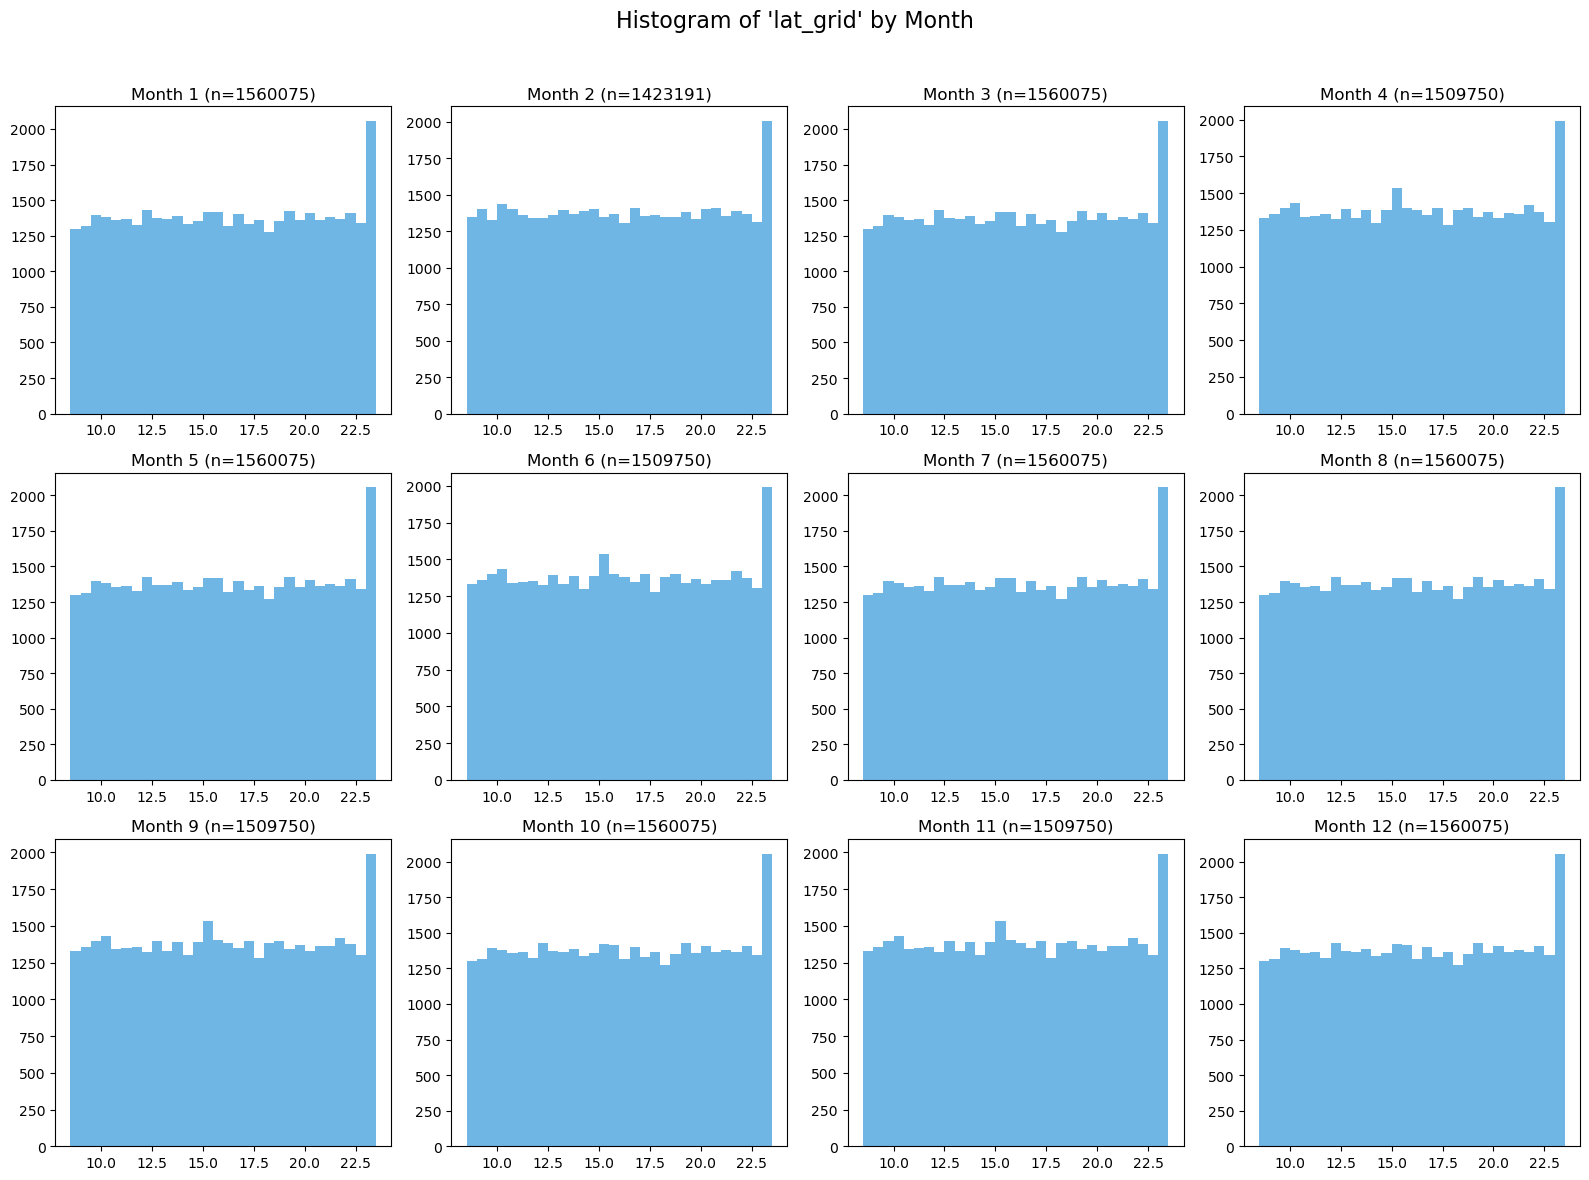

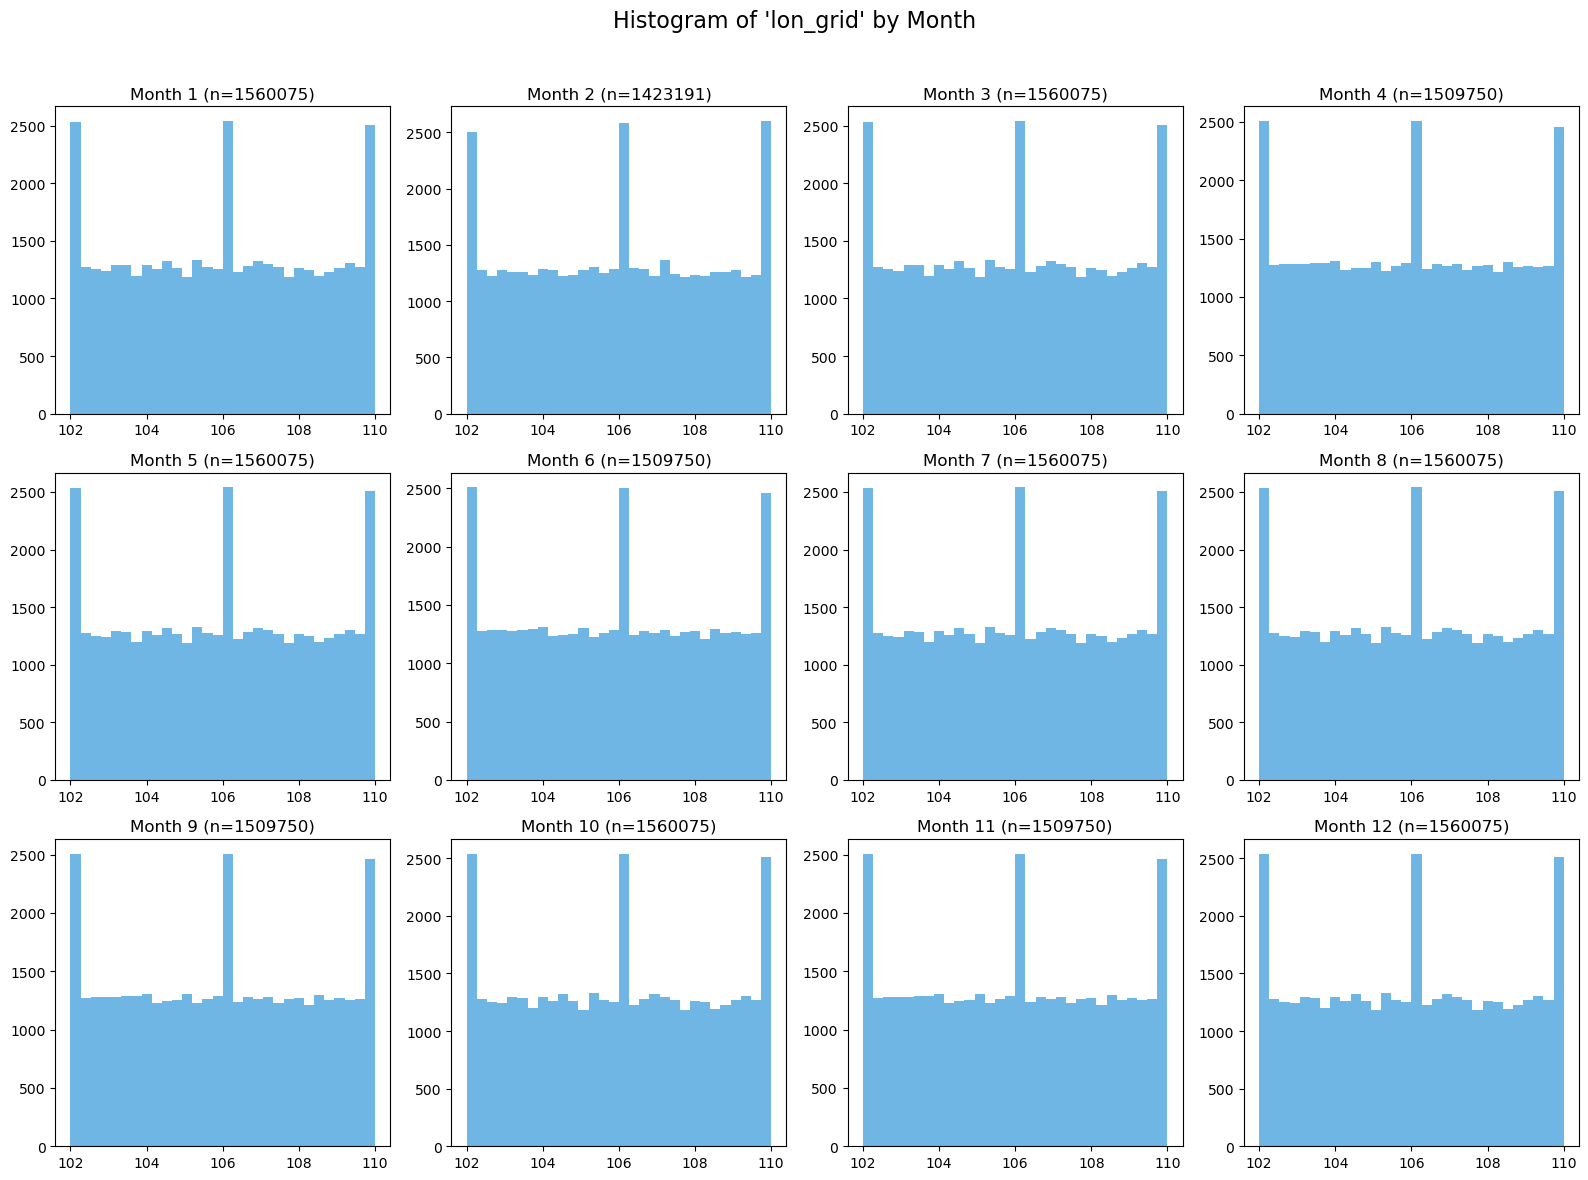

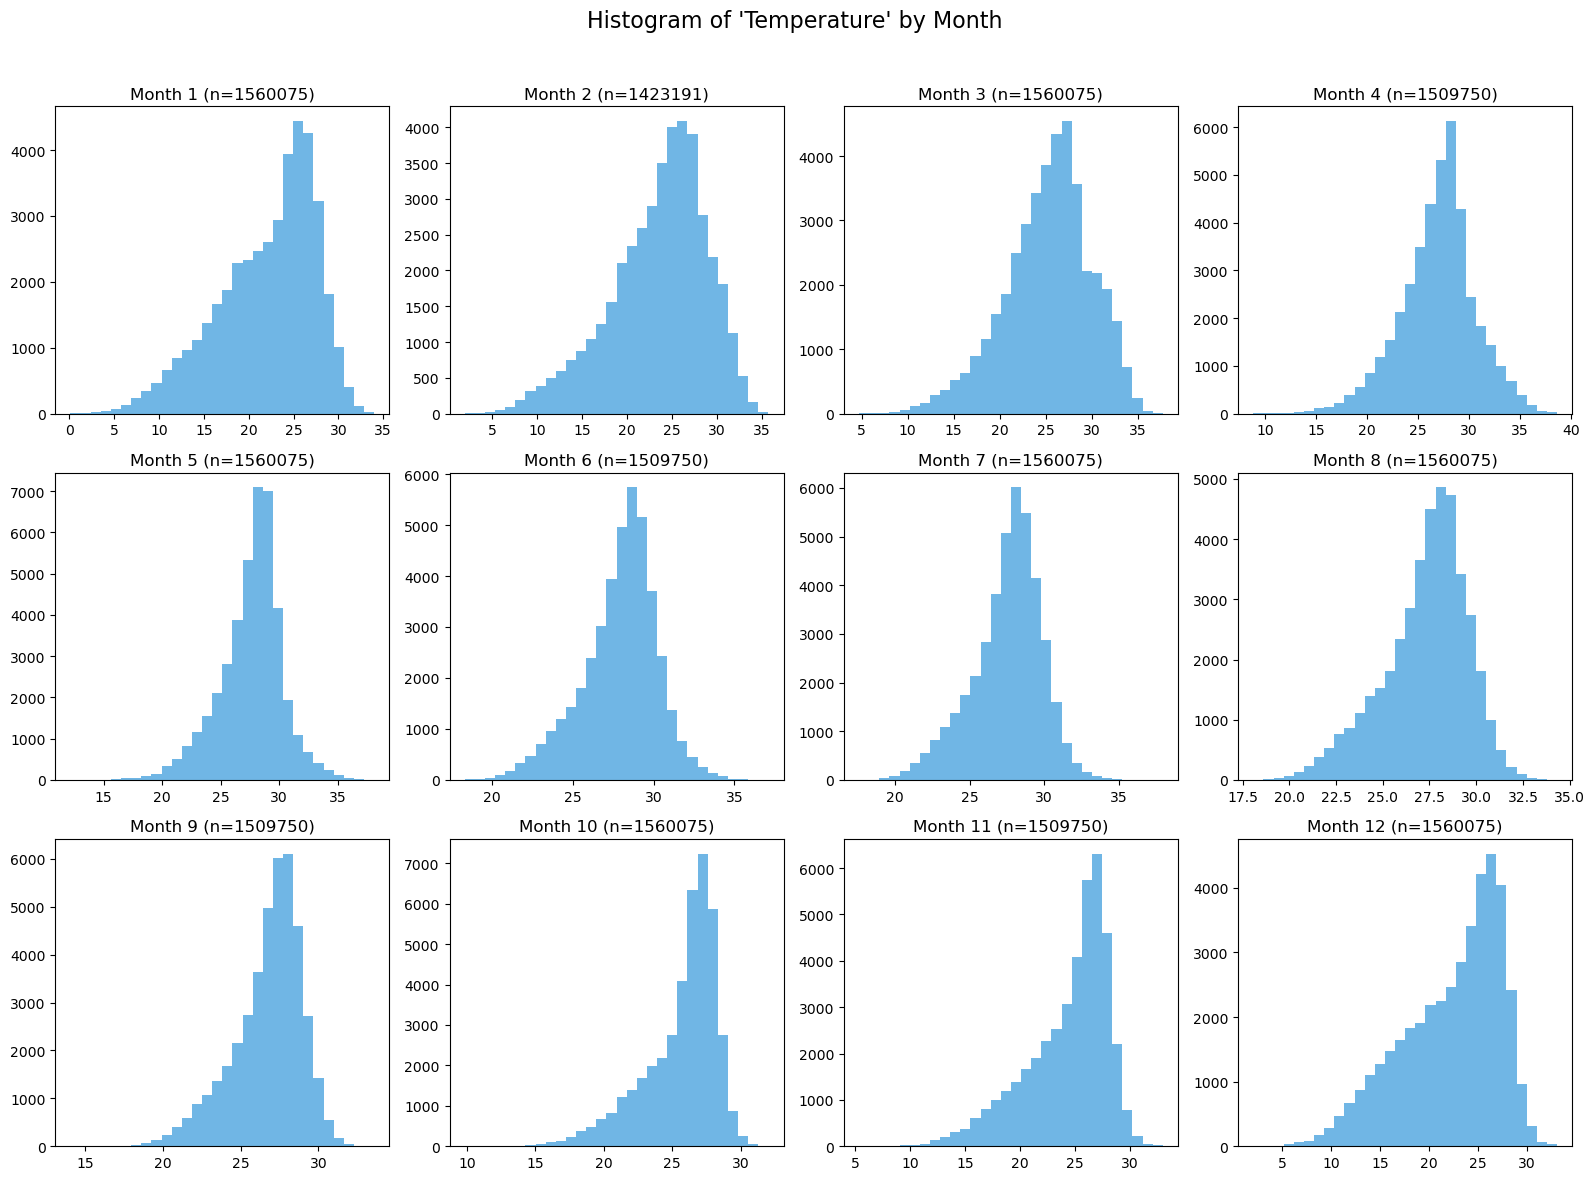

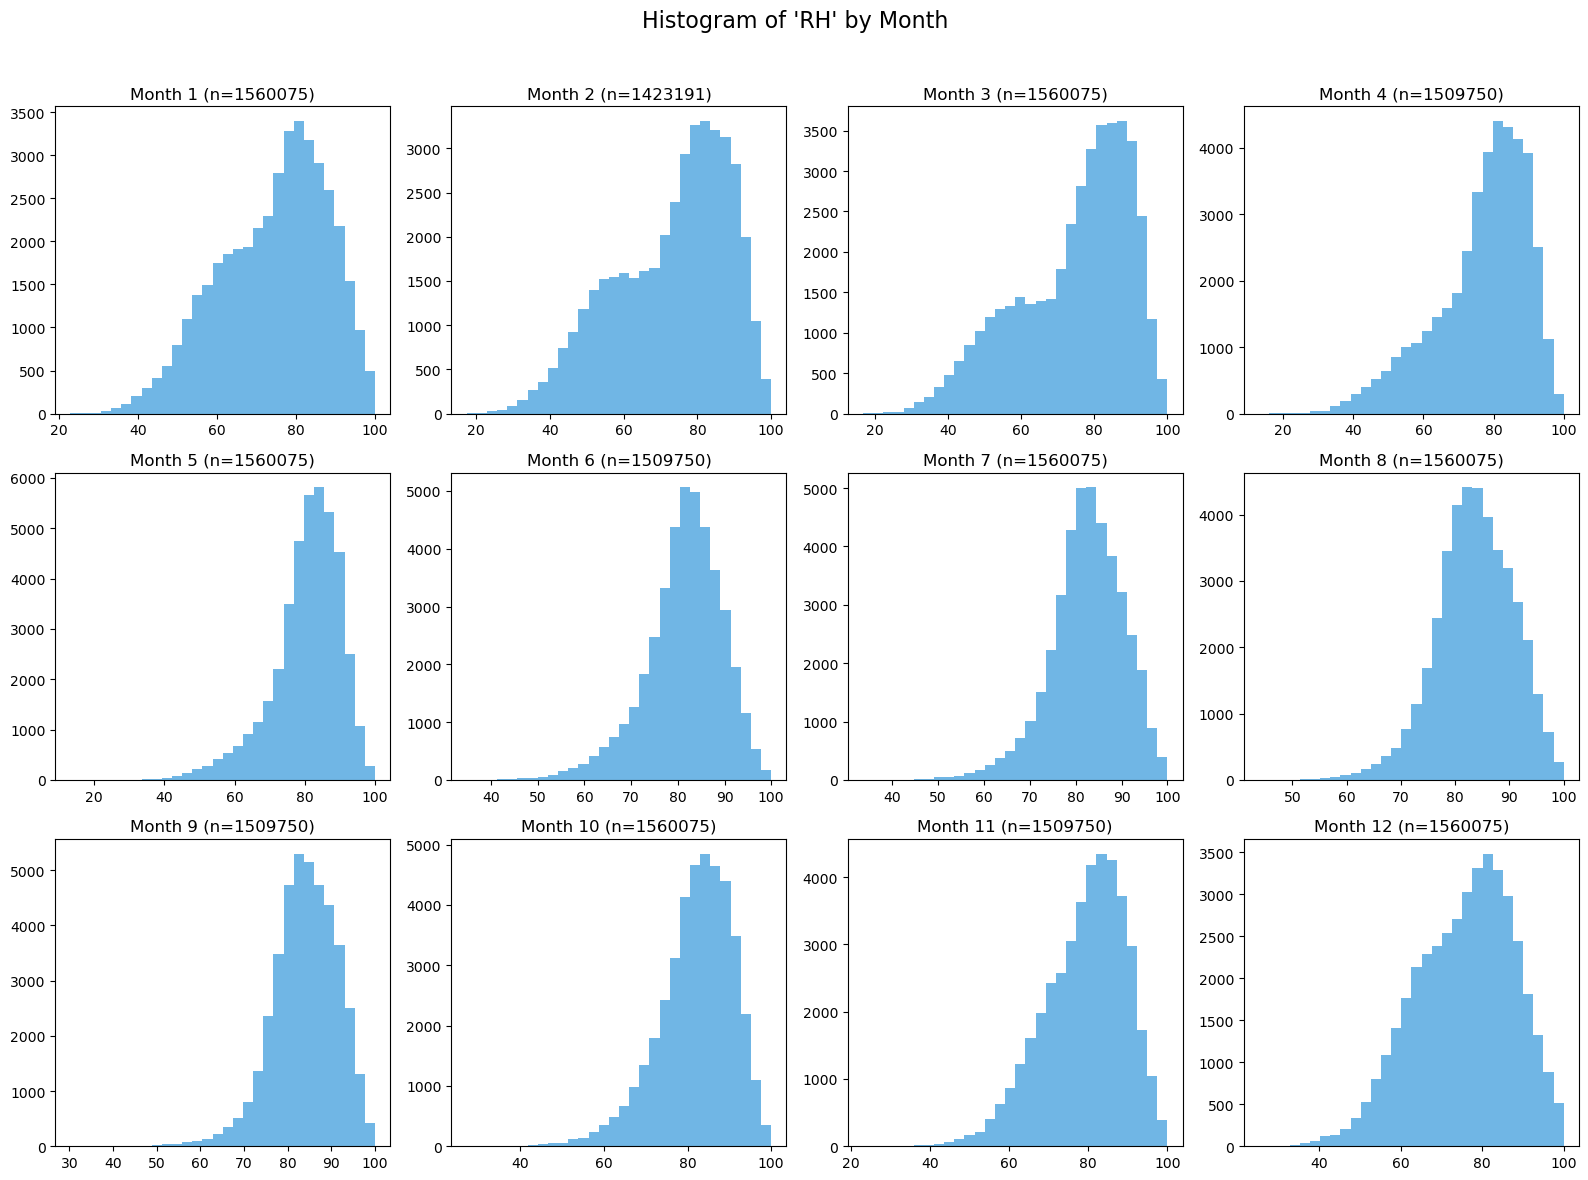

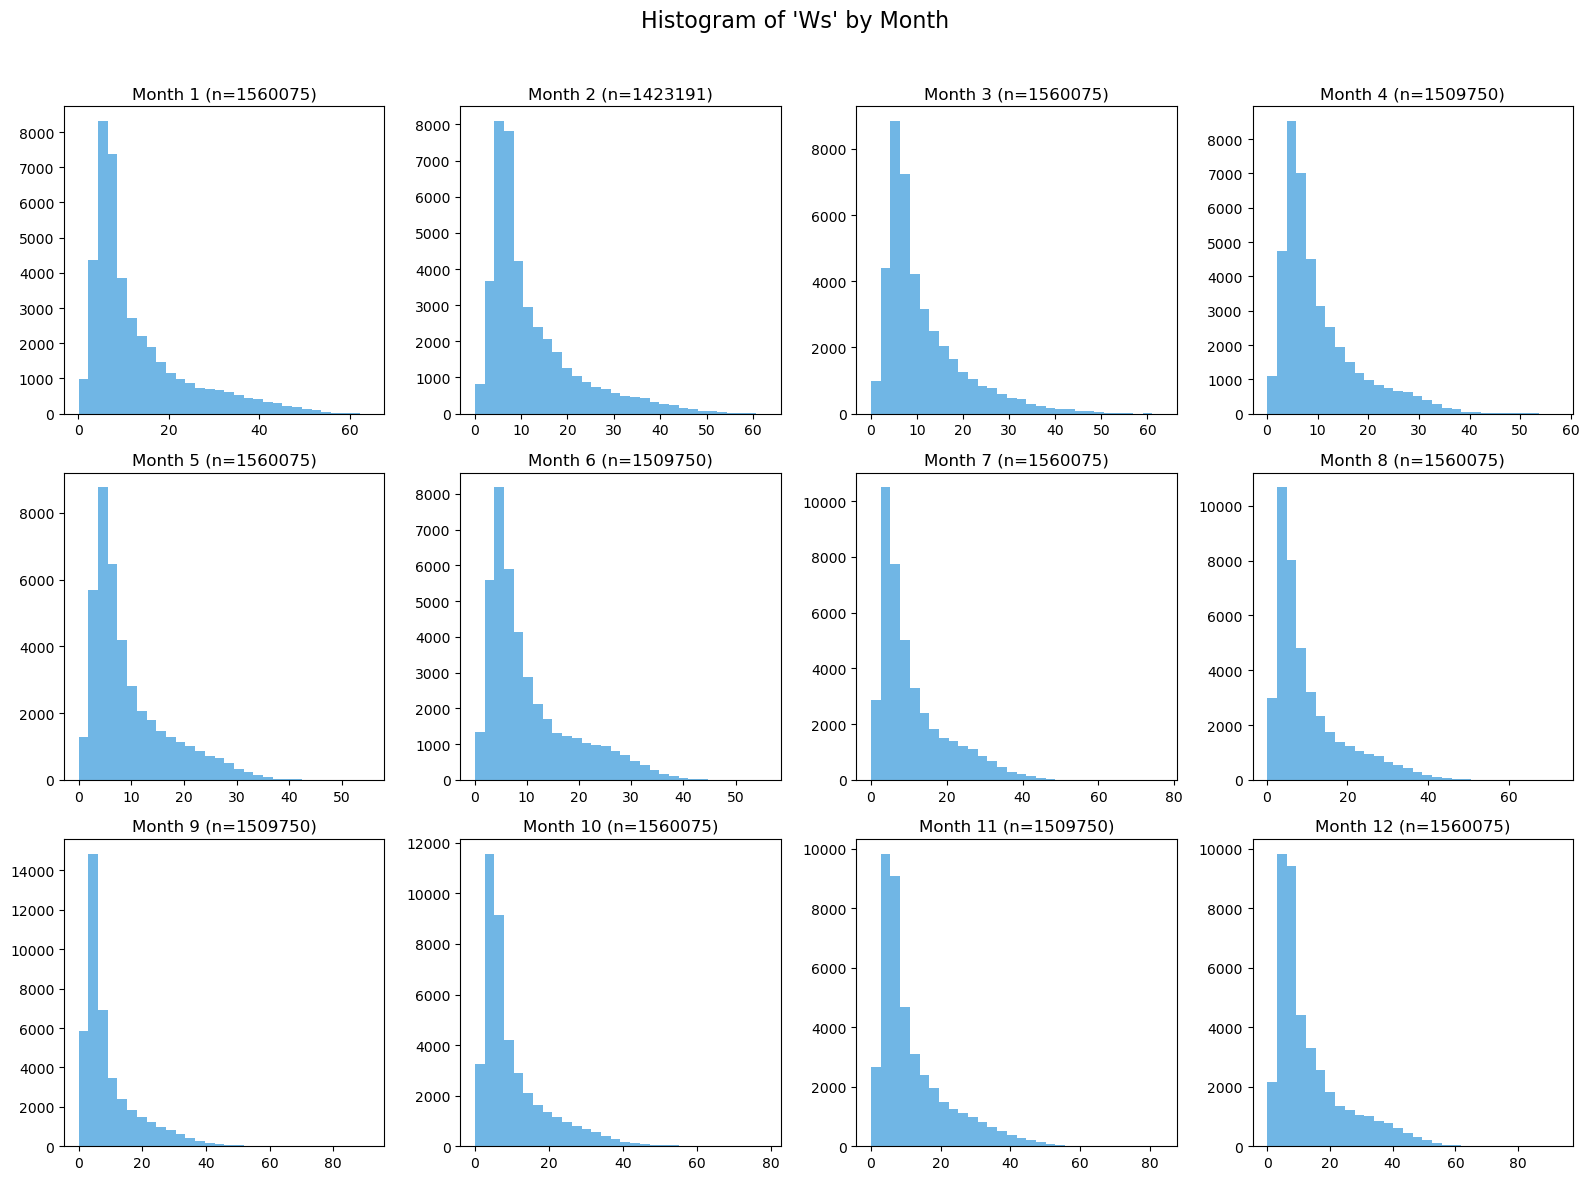

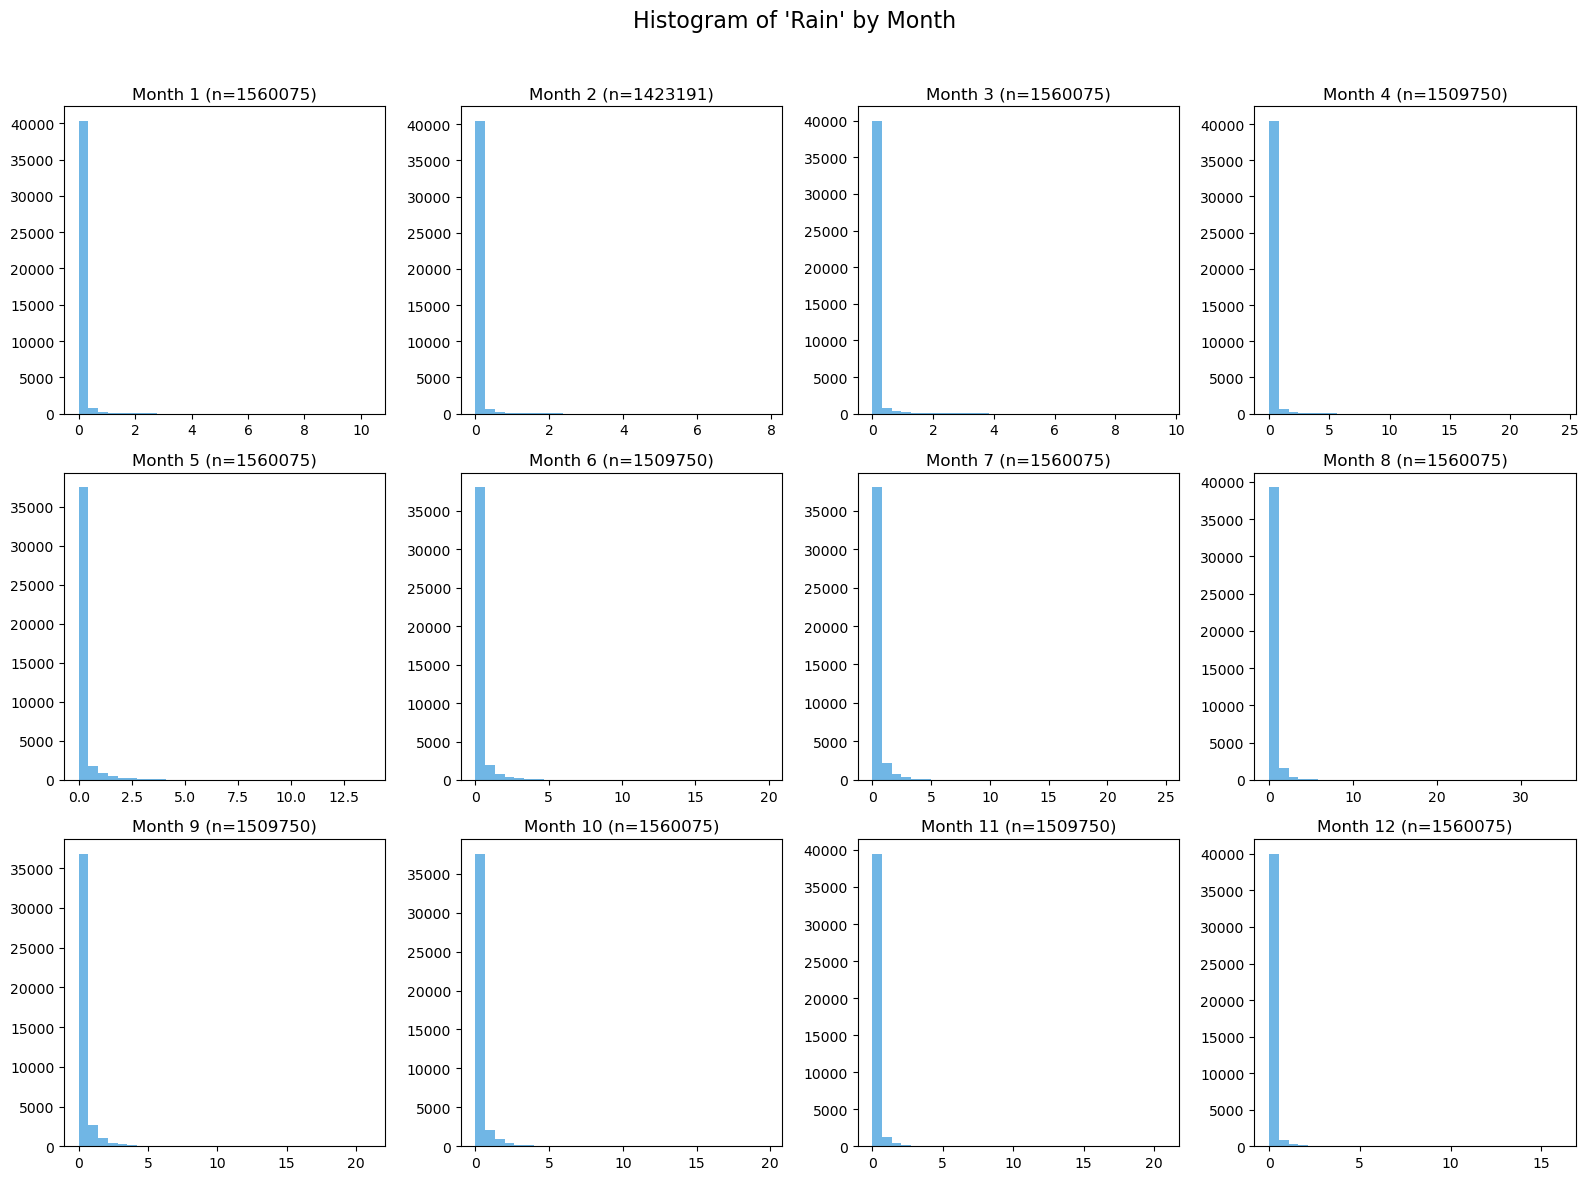

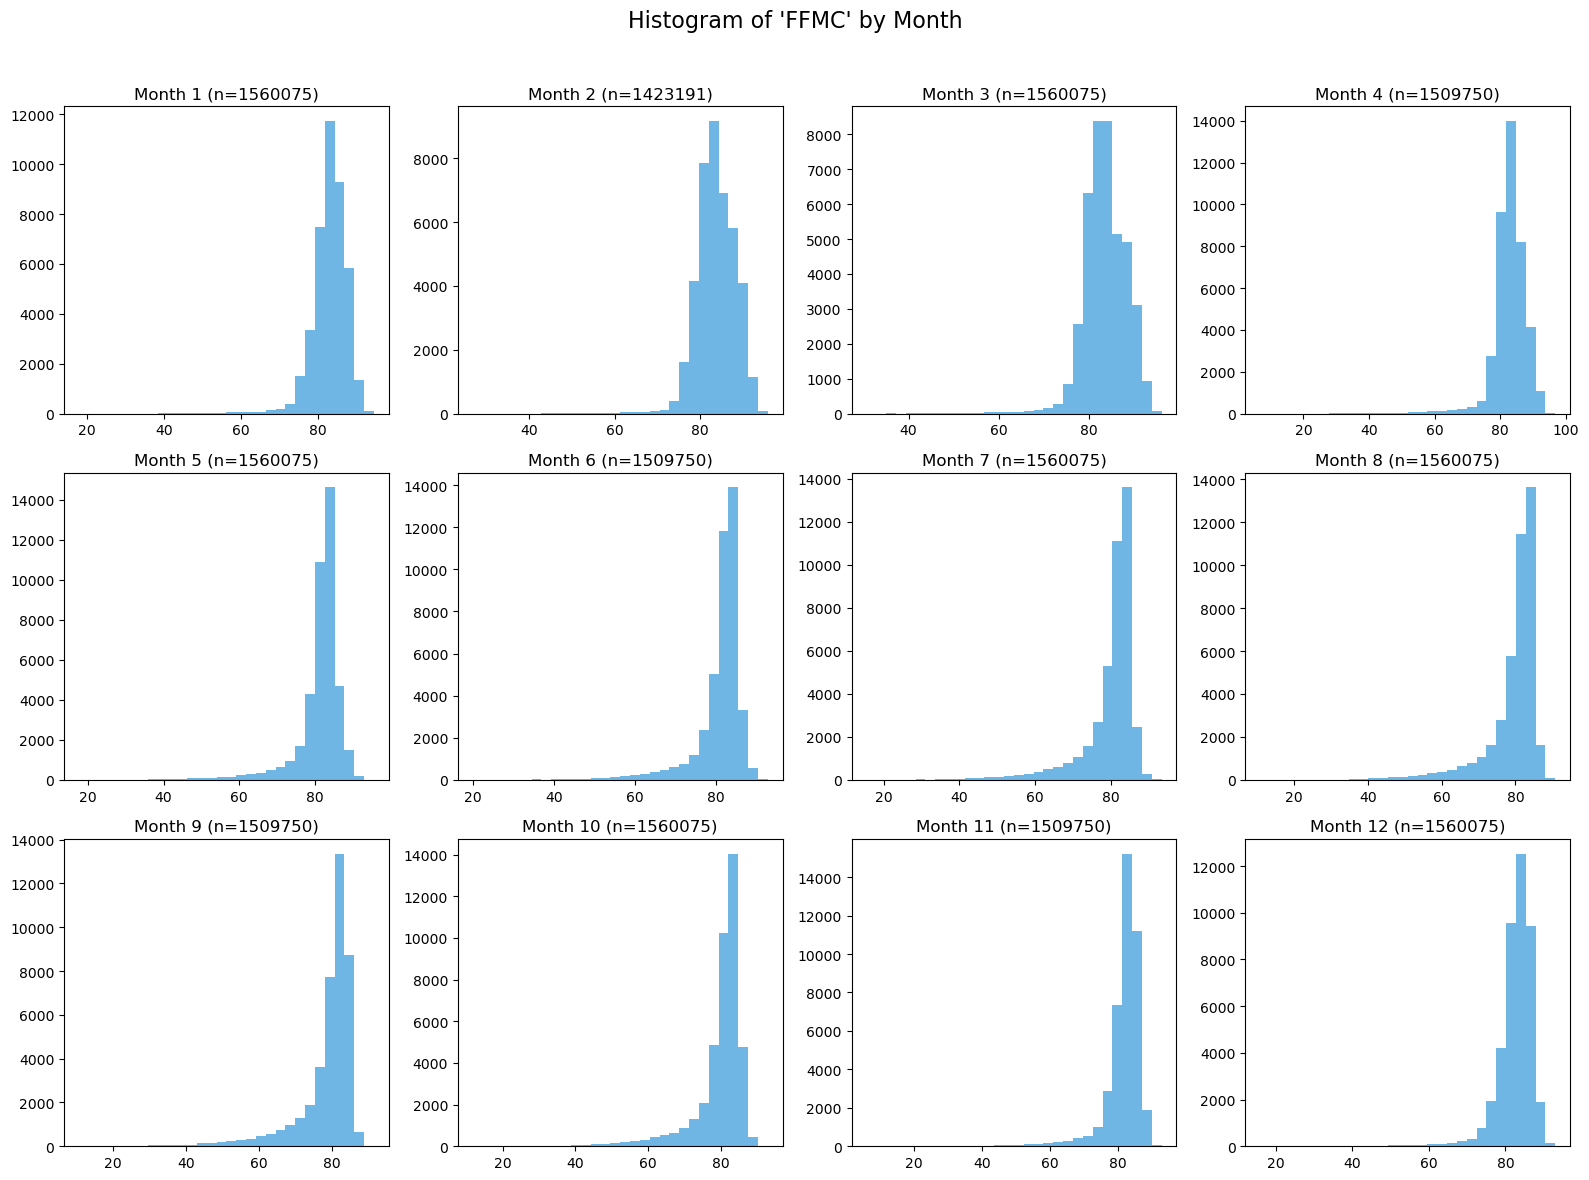

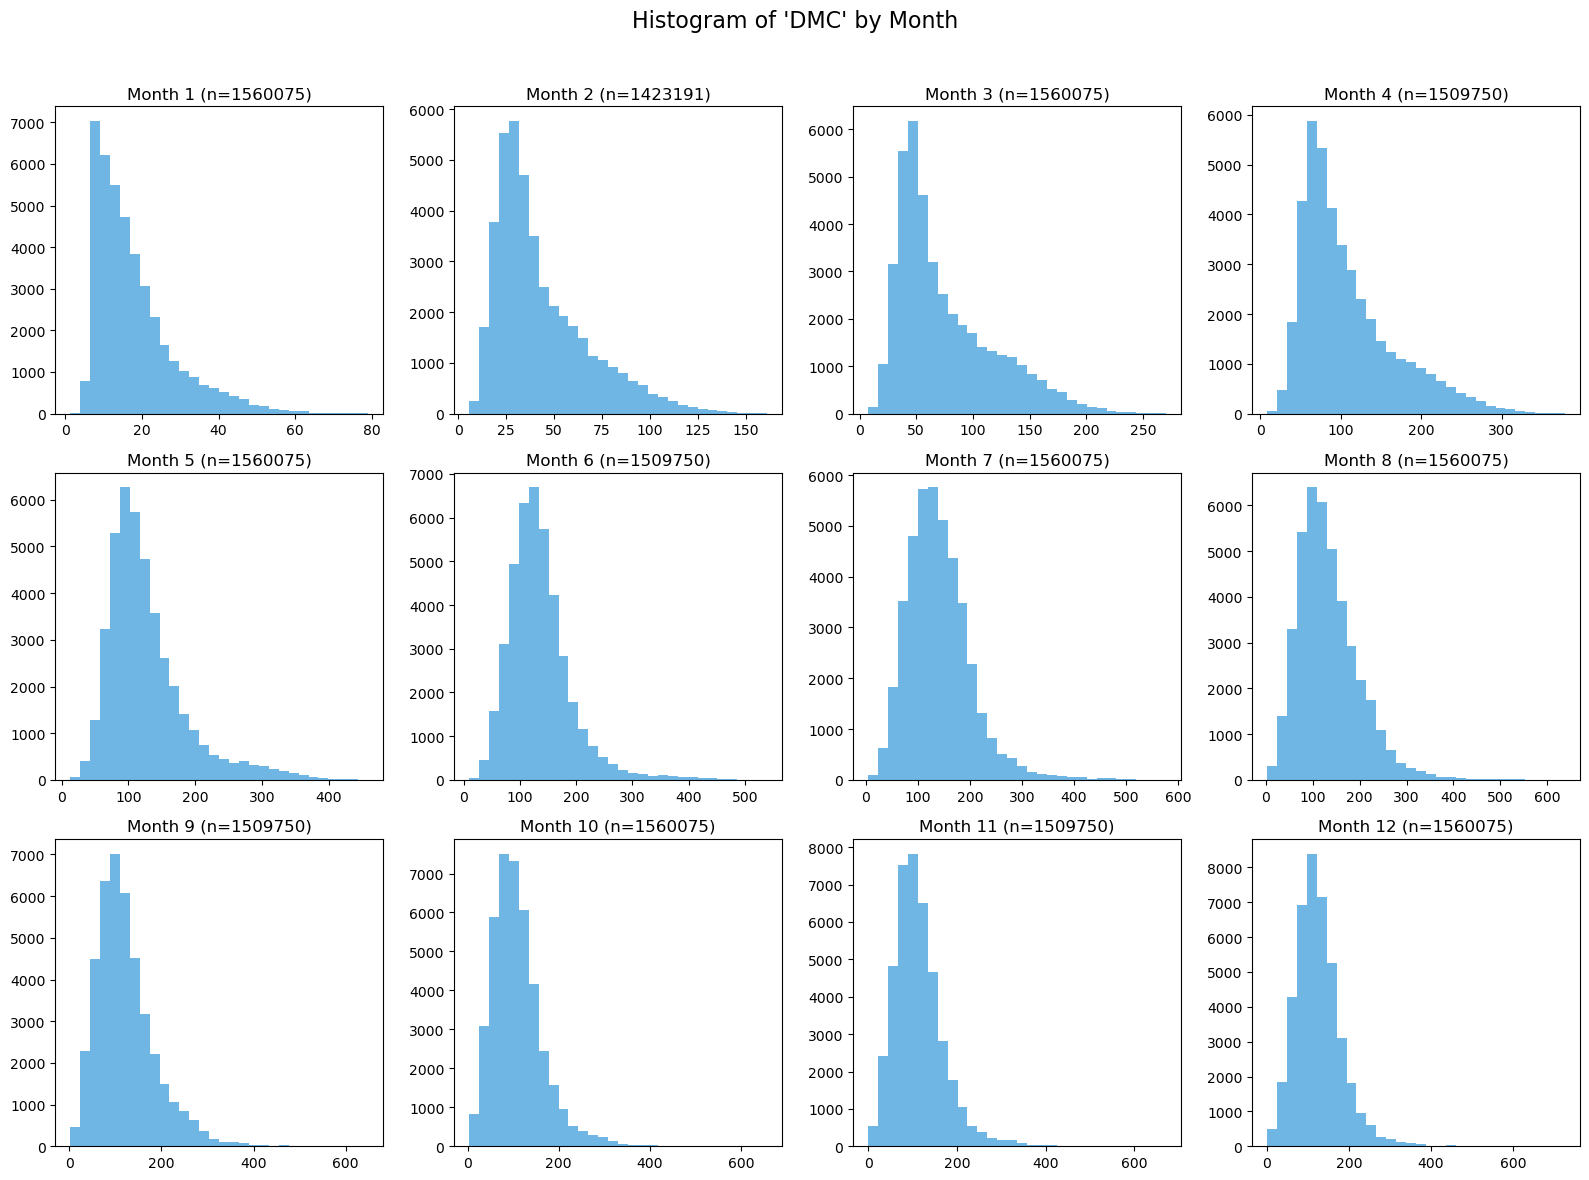

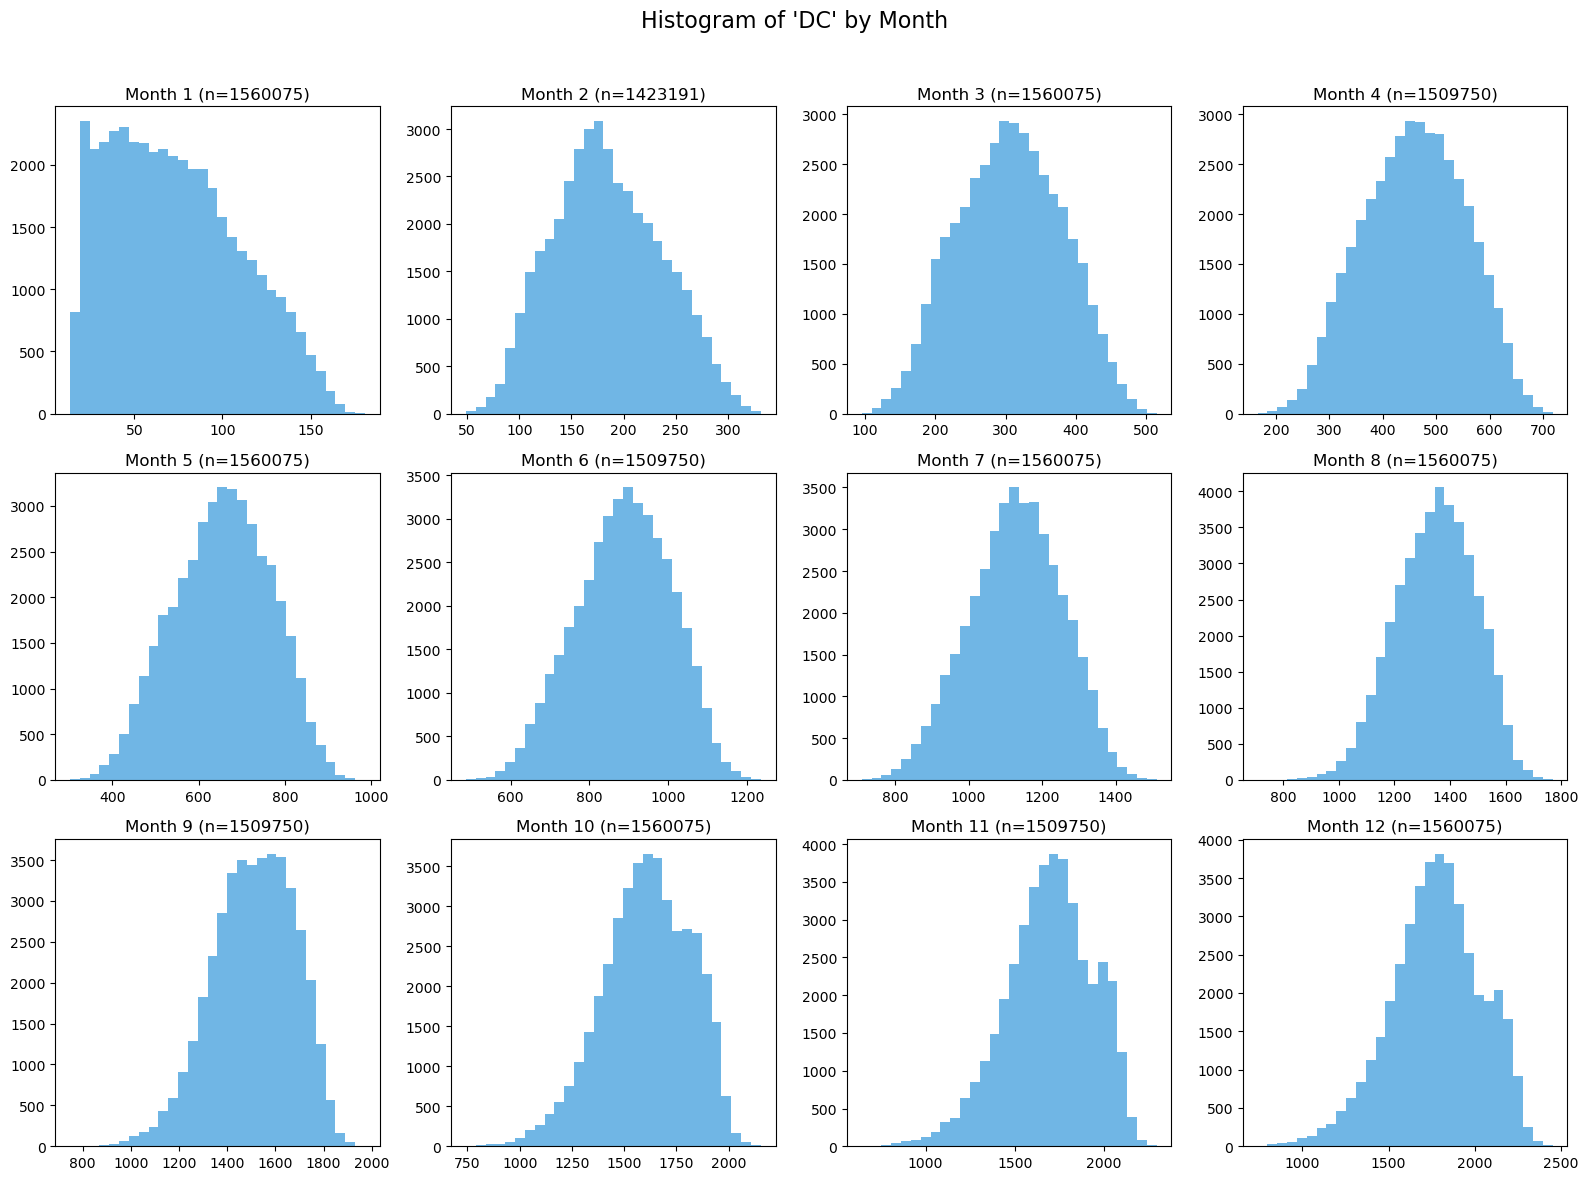

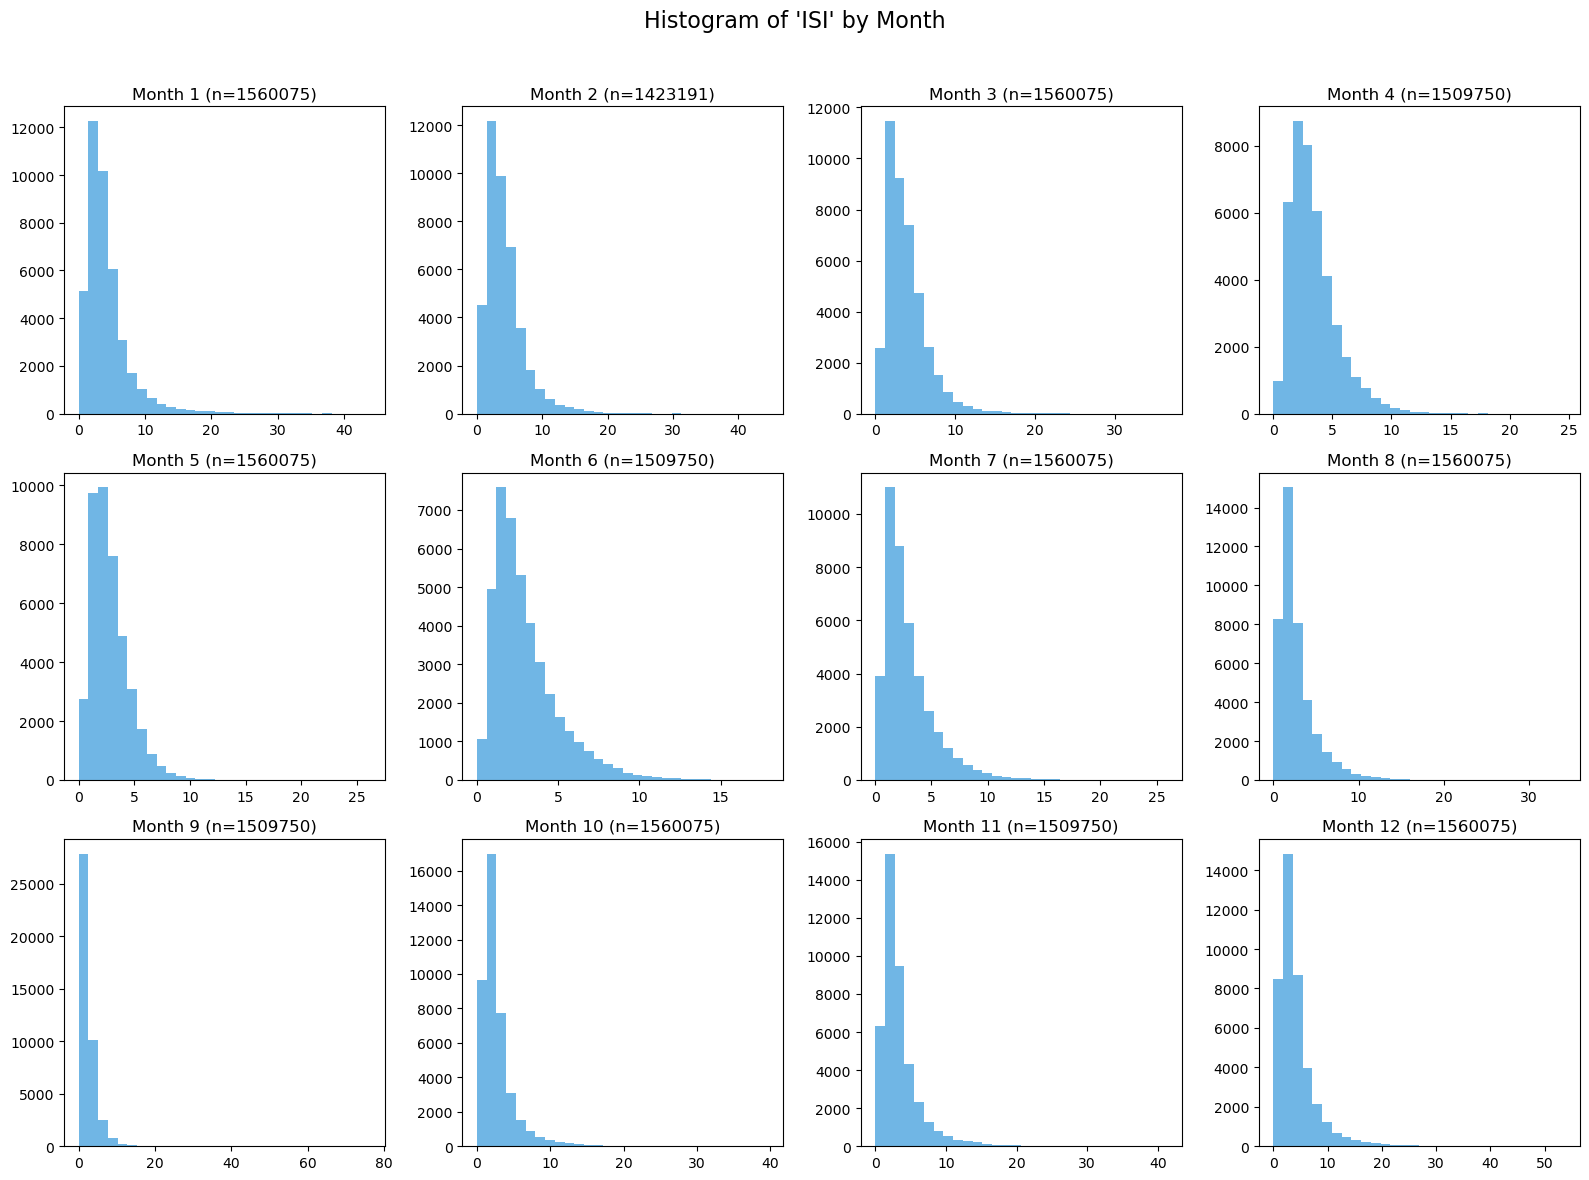

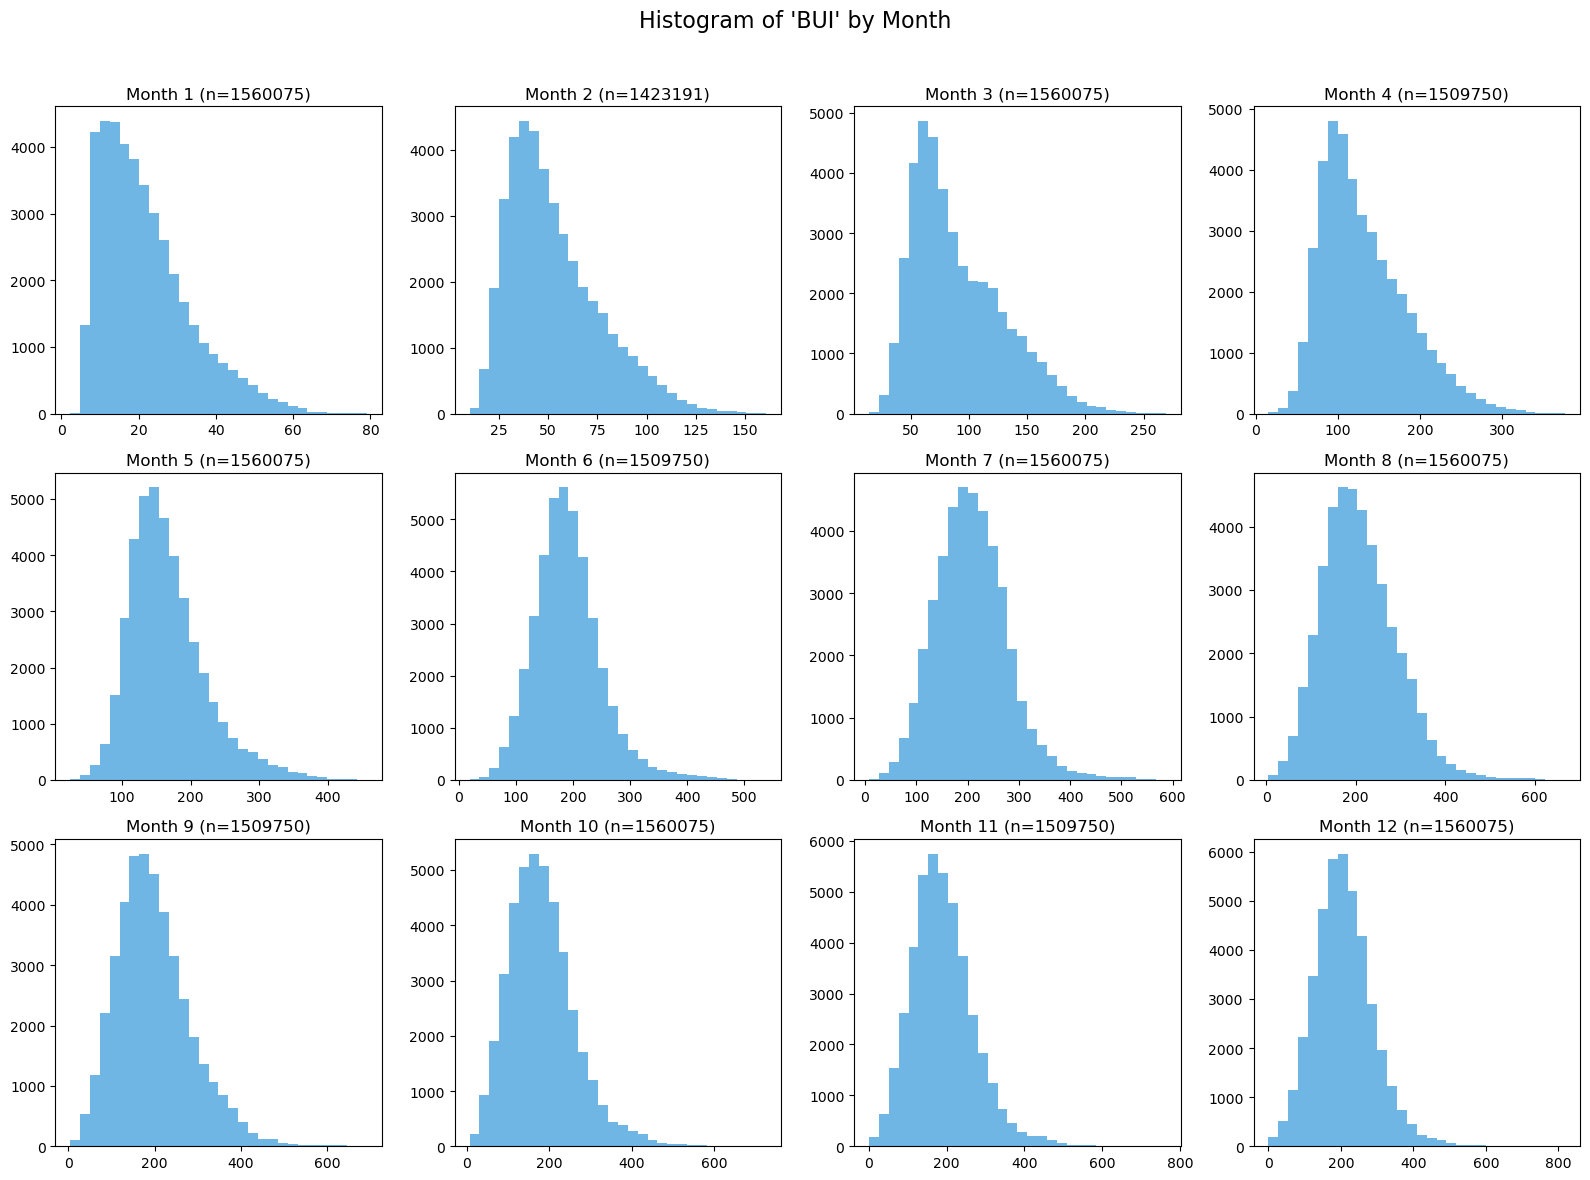

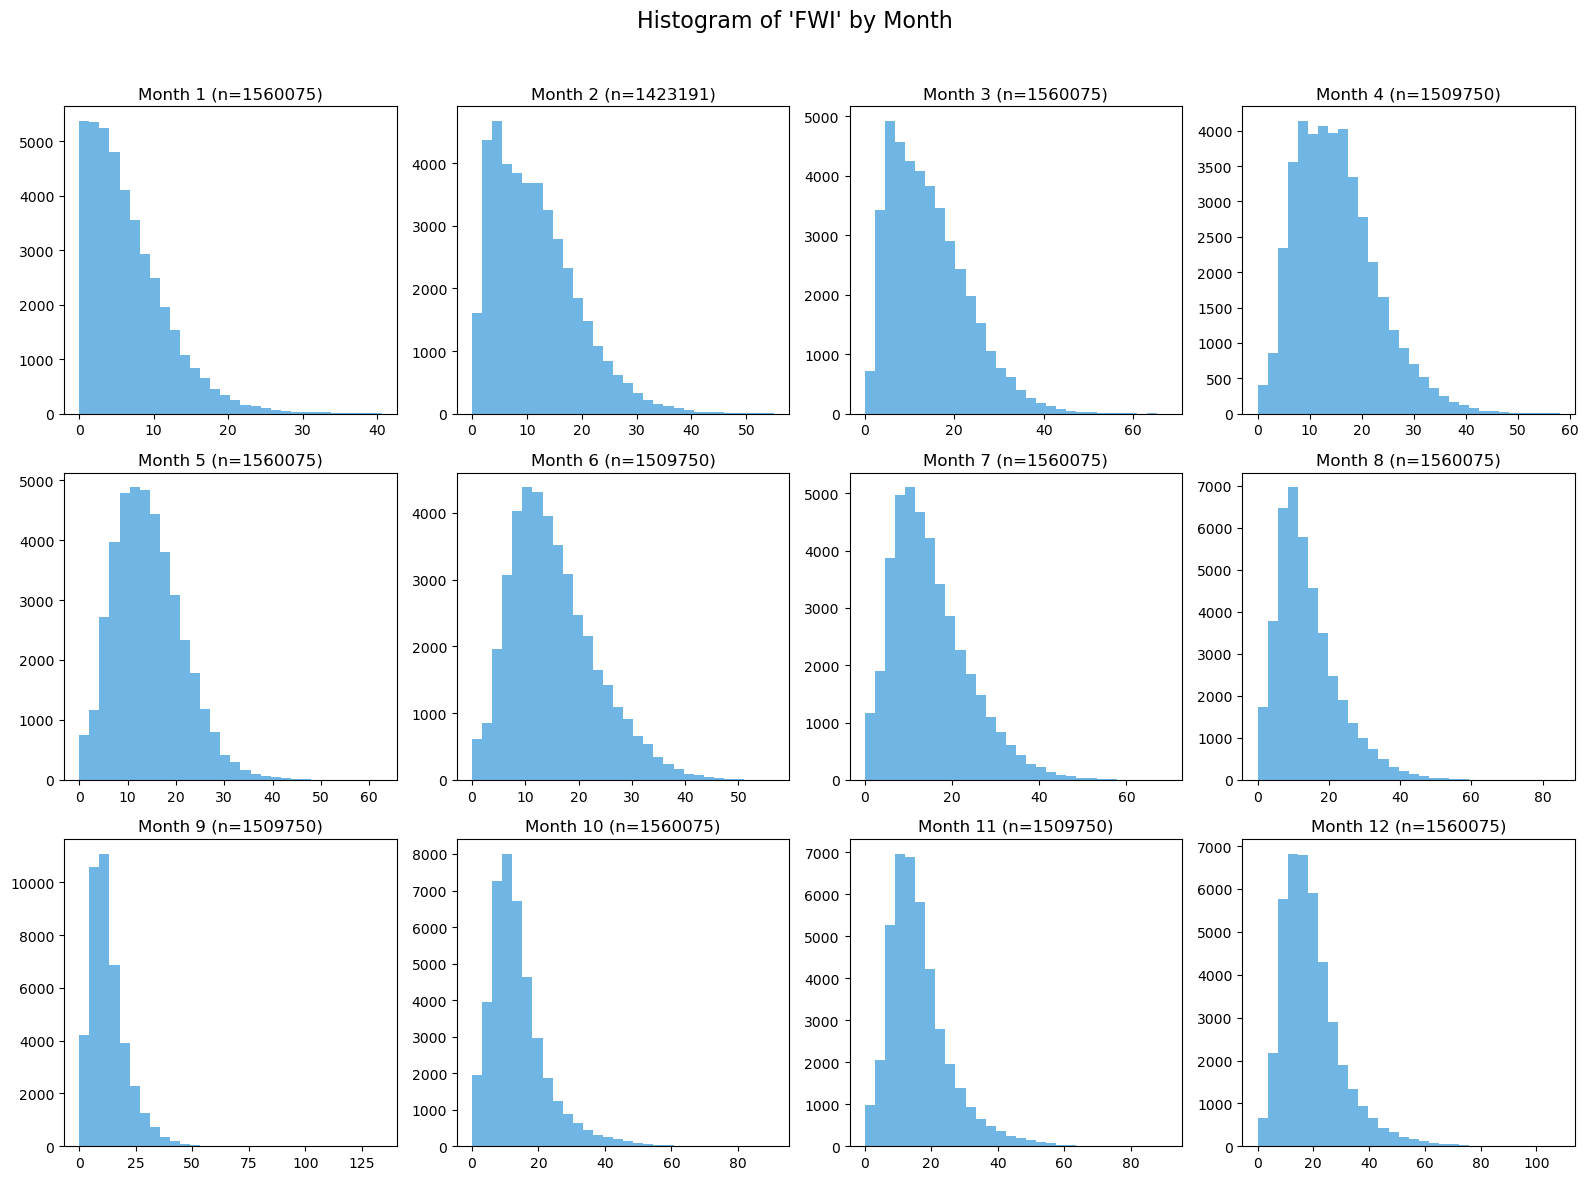

In [14]:
# Histograms for all numeric columns by month (one figure per numeric column)
# Uses existing variables: df, num_cols, max_points, c
if "month" not in df.columns:
    df["month"] = pd.to_datetime(df["date"]).dt.month

# samples per month to keep plotting responsive
per_month_limit = max(1, int(max_points / 12))

for col in num_cols:
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.flatten()
    for m in range(1, 13):
        ax = axes[m - 1]
        mdf = df[df["month"] == m]
        if mdf.empty:
            ax.text(0.5, 0.5, "No data", ha="center", va="center")
            ax.set_title(f"Month {m} (n=0)")
            ax.set_xticks([])
            ax.set_yticks([])
            continue

        data = mdf[col].dropna()
        n = min(len(data), per_month_limit)
        if len(data) > n:
            data = data.sample(n=n, random_state=0)

        ax.hist(data, bins=30, color=c, alpha=0.7)
        ax.set_title(f"Month {m} (n={len(mdf)})")
        ax.grid(False)

    # remove any extra subplot ticks/labels visual clutter
    for ax in axes[len(range(1,13)):]:
        ax.set_visible(False)

    plt.suptitle(f"Histogram of '{col}' by Month", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

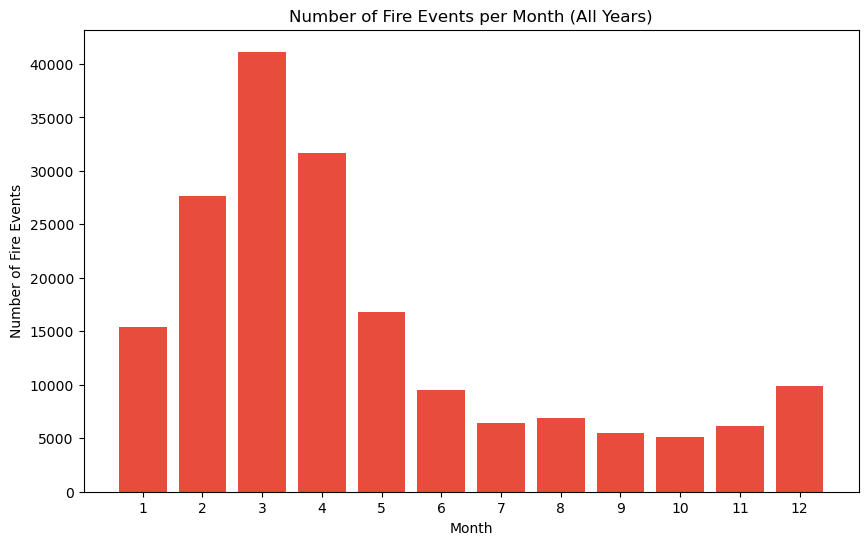

In [15]:
# Đếm số lượng vụ cháy theo từng tháng trên toàn bộ dữ liệu
fire_counts_by_month = df[df["Classes"] == "fire"]["month"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(fire_counts_by_month.index, fire_counts_by_month.values, color=colors[0])
plt.xlabel("Month")
plt.ylabel("Number of Fire Events")
plt.title("Number of Fire Events per Month (All Years)")
plt.xticks(range(1, 13))
plt.show()